# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from scipy.stats.mstats import winsorize

from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/grade_2/pattern_recognition/project/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/grade_2/pattern_recognition/project/dataset/test.csv')

In [ ]:
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

In [ ]:
duplicate_count = train[train.duplicated()]
print(duplicate_count)

Empty DataFrame
Columns: [id, age, job, marital, education, default, housing, loan, contact, month, day_of_week, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


# Data Exploration

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

In [ ]:
# replace unknown values with nan
train_fixed=train.replace('unknown', np.nan, inplace=False)
train=train_fixed
print(train.isnull().sum(), '\n')

id                   0
age                  0
job                257
marital             62
education         1388
default           6853
housing            799
loan               799
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64 



## visualization_histogram & bar chart

### 2 age

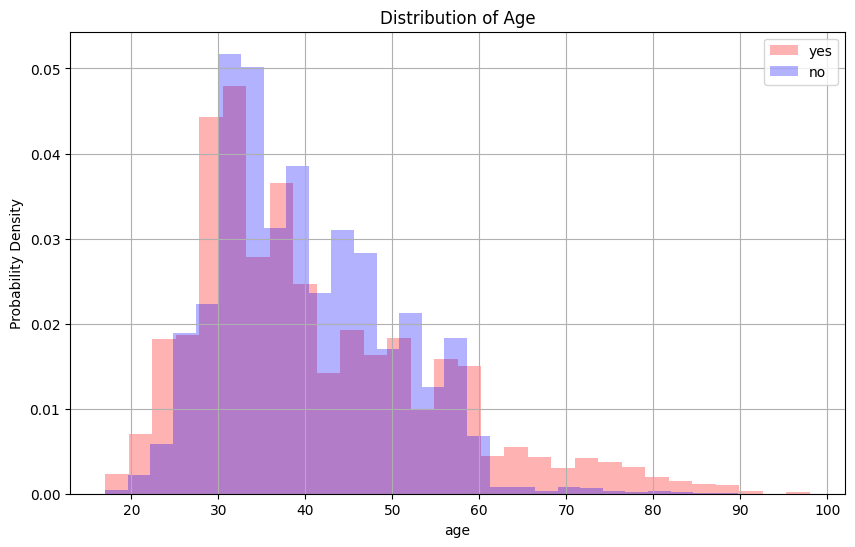

In [ ]:
var = "age"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))

train[train['y'] == 'yes'][var].hist(bins=bins, density=density, alpha=alpha, color="red", label="yes")
train[train['y'] == 'no'][var].hist(bins=bins, density=density, alpha=alpha, color="blue", label="no")

plt.title('Distribution of Age')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### 3 job

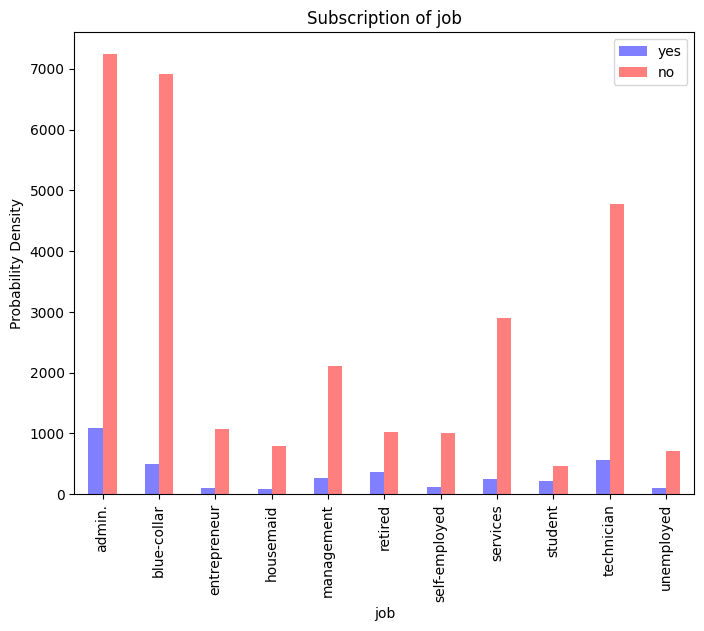

In [ ]:
# job count

var = "job"
target = "y"
bins = 30
density = True
alpha = 0.3

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(8,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of job')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'job', count the number of each category
# =======before reindexing=======
job_total=pd.DataFrame(train['job'].value_counts())
job_yes= pd.DataFrame(train[train['y'] == 'yes']['job'].value_counts(normalize=False))
job_no=pd.DataFrame(train[train['y'] == 'no']['job'].value_counts(normalize=False))

# set index with each category of 'job'
# =======after reindexing=======
job_total=job_total.reindex(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed'])
job_yes=job_yes.reindex(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed'])
job_no=job_no.reindex(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed'])

# =======ratio=======
yes_ratio=job_yes.div(job_total)
no_ratio=job_no.div(job_total)
job_ratio=yes_ratio.merge(no_ratio, on='job')
job_ratio.columns=['yes_ratio','no_ratio']

print('job_ratio:\n',job_ratio)

job_ratio:
                yes_ratio  no_ratio
job                               
admin.          0.131269  0.868731
blue-collar     0.066946  0.933054
entrepreneur    0.088360  0.911640
housemaid       0.094253  0.905747
management      0.111485  0.888515
retired         0.259420  0.740580
self-employed   0.108561  0.891439
services        0.081646  0.918354
student         0.319364  0.680636
technician      0.106789  0.893211
unemployed      0.133907  0.866093


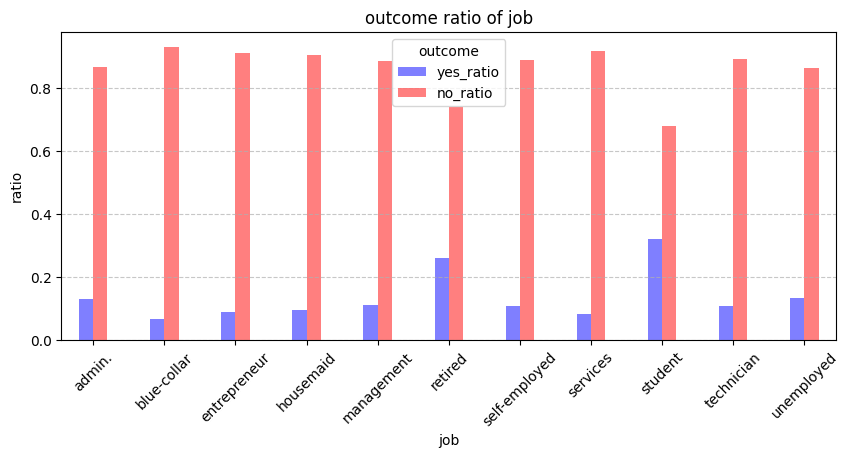

In [ ]:
# job ratio

job_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of job')
plt.xlabel('job')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4 marital

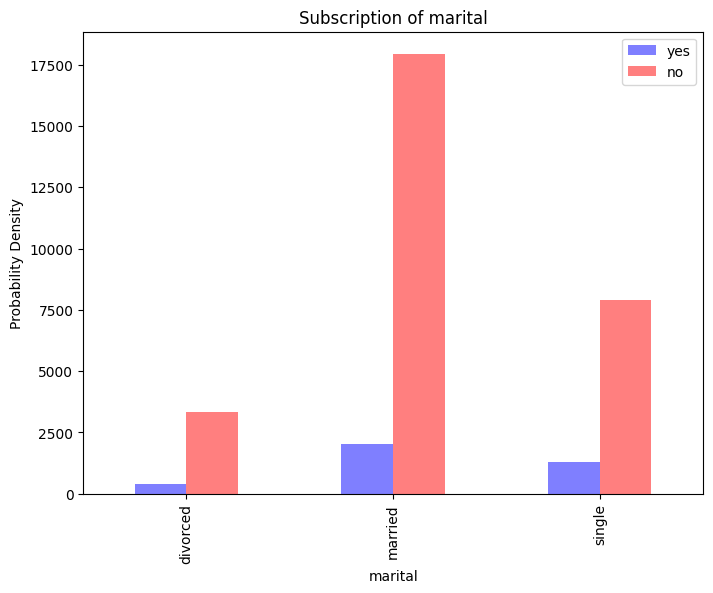

In [ ]:
# marital count

var = "marital"
target = "y"
bins = 30
density = True
alpha = 0.3

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(8,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of marital')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'marital', count the number for each category
# =======before reindexing=======
marital_total=pd.DataFrame(train['marital'].value_counts())
marital_yes= pd.DataFrame(train[train['y'] == 'yes']['marital'].value_counts(normalize=False))
marital_no=pd.DataFrame(train[train['y'] == 'no']['marital'].value_counts(normalize=False))

# set index with each category of 'marital'
# =======after reindexing=======
marital_total=marital_total.reindex(['divorced','married','single'])
marital_yes=marital_yes.reindex(['divorced','married','single'])
marital_no=marital_no.reindex(['divorced','married','single'])

# =======ratio=======
yes_ratio=marital_yes.div(marital_total)
no_ratio=marital_no.div(marital_total)
marital_ratio=yes_ratio.merge(no_ratio, on='marital')
marital_ratio.columns=['yes_ratio','no_ratio']

print('marital_ratio:\n',marital_ratio,'\n\n')

marital_ratio:
           yes_ratio  no_ratio
marital                      
divorced   0.105192  0.894808
married    0.101162  0.898838
single     0.140606  0.859394 




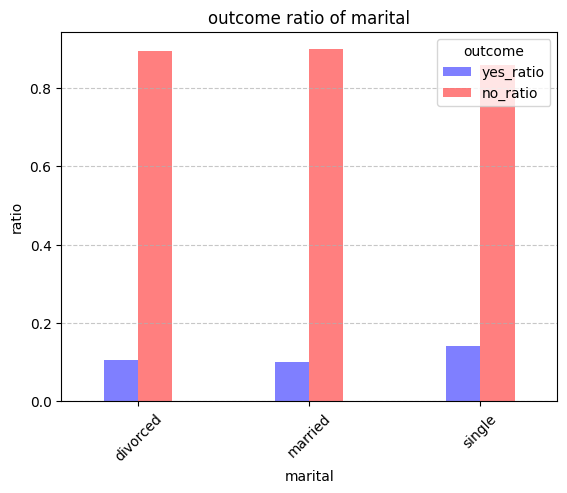

In [ ]:
# marital ratio

marital_ratio.plot(kind='bar', stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of marital')
plt.xlabel('marital')
plt.ylabel('ratio')
plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5 education

<Figure size 1000x600 with 0 Axes>

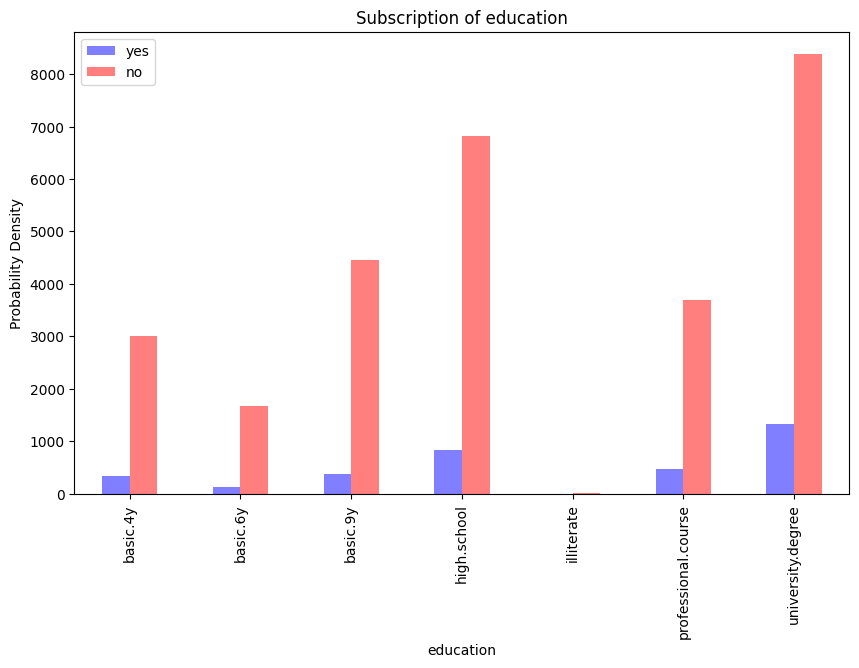

In [ ]:
# educataion count

var = "education"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of education')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'education', count the number of each category
# =======before reindexing=======
education_total=pd.DataFrame(train['education'].value_counts())
education_yes= pd.DataFrame(train[train['y'] == 'yes']['education'].value_counts(normalize=False))
education_no=pd.DataFrame(train[train['y'] == 'no']['education'].value_counts(normalize=False))

# set index with each category of 'education'
# ======after reindexing=======
education_total=education_total.reindex(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'])
education_yes=education_yes.reindex(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'])
education_no=education_no.reindex(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'])

# =======ratio=======
yes_ratio=education_yes.div(education_total)
no_ratio=education_no.div(education_total)
education_ratio=yes_ratio.merge(no_ratio, on='education')
education_ratio.columns=['yes_ratio','no_ratio']

print('education_ratio:\n',education_ratio,'\n\n')

education_ratio:
                      yes_ratio  no_ratio
education                               
basic.4y              0.099940  0.900060
basic.6y              0.075824  0.924176
basic.9y              0.077702  0.922298
high.school           0.109848  0.890152
illiterate            0.176471  0.823529
professional.course   0.113702  0.886298
university.degree     0.137168  0.862832 




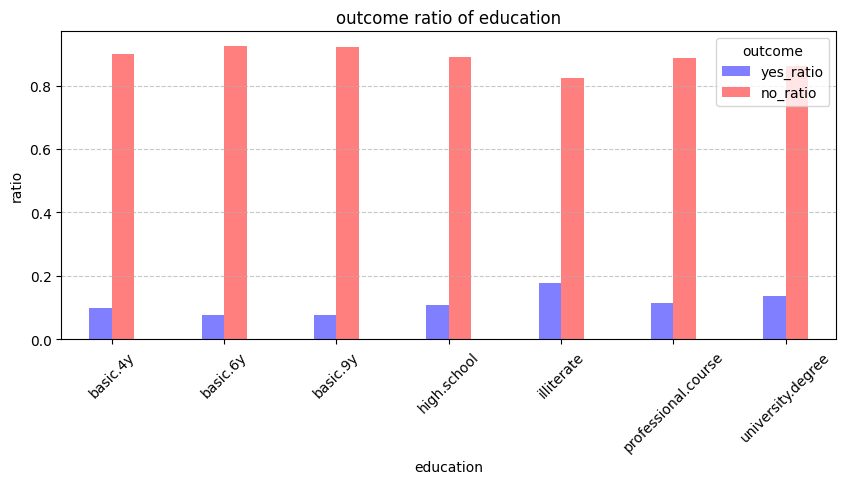

In [ ]:
#education ratio

education_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of education')
plt.xlabel('education')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6 default

<Figure size 1000x600 with 0 Axes>

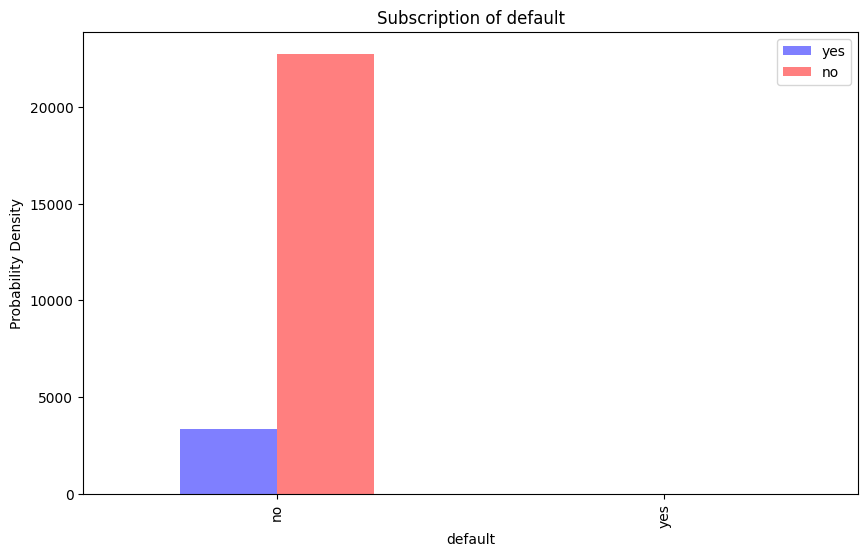

In [ ]:
#default_count

var = "default"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of default')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [ ]:
# for 'default', count the number of each category
# =======before reindexing=======
default_total=pd.DataFrame(train['default'].value_counts())
default_yes= pd.DataFrame(train[train['y'] == 'yes']['default'].value_counts(normalize=False))
default_no=pd.DataFrame(train[train['y'] == 'no']['default'].value_counts(normalize=False))

# set index with each category of 'default'
# =======after reindexing=======
default_total=default_total.reindex(['no','yes'])
default_yes=default_yes.reindex(['no','yes'])
default_no=default_no.reindex(['no','yes'])

# =======ratio=======
yes_ratio=default_yes.div(default_total)
no_ratio=default_no.div(default_total)
default_ratio=yes_ratio.merge(no_ratio, on='default')
default_ratio.columns=['yes_ratio','no_ratio']

print('default_ratio:\n',default_ratio,'\n\n')

default_ratio:
          yes_ratio  no_ratio
default                     
no        0.128804  0.871196
yes            NaN  1.000000 




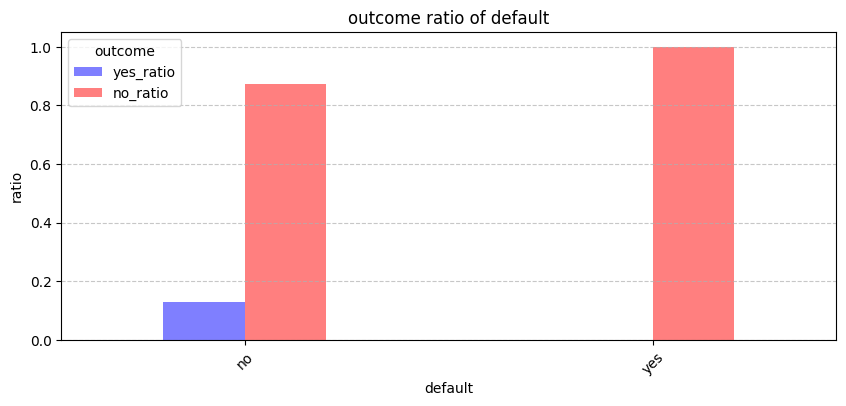

In [ ]:
#default ratio

default_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of default')
plt.xlabel('default')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 7 housing

<Figure size 1000x600 with 0 Axes>

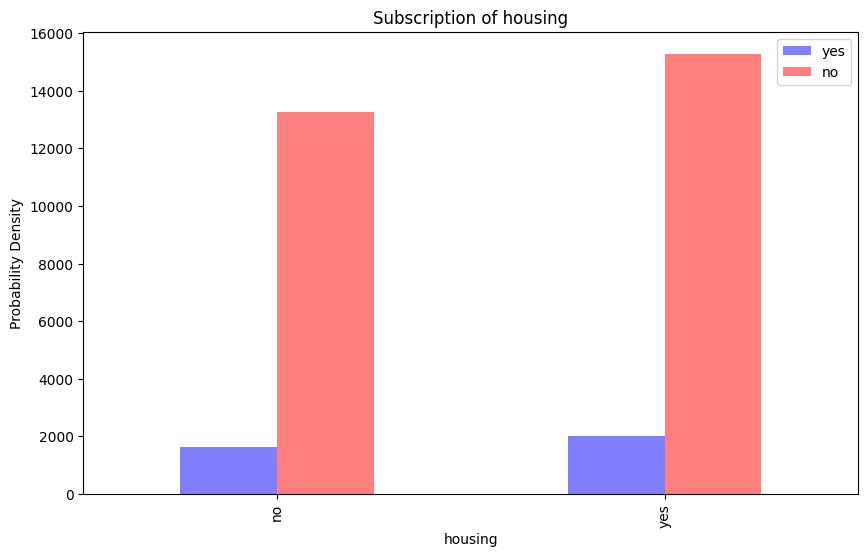

In [ ]:
#housing count

var = "housing"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of housing')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [ ]:
# for 'housing', count the number of each category
# =======before reindexing=======
housing_total=pd.DataFrame(train['housing'].value_counts())
housing_yes= pd.DataFrame(train[train['y'] == 'yes']['housing'].value_counts(normalize=False))
housing_no=pd.DataFrame(train[train['y'] == 'no']['housing'].value_counts(normalize=False))

# set index with each category of 'housing'
# =======after reindexing=======
housing_total=housing_total.reindex(['no','yes'])
housing_yes=housing_yes.reindex(['no','yes'])
housing_no=housing_no.reindex(['no','yes'])

# =======ratio=======
yes_ratio=housing_yes.div(housing_total)
no_ratio=housing_no.div(housing_total)
housing_ratio=yes_ratio.merge(no_ratio, on='housing')
housing_ratio.columns=['yes_ratio','no_ratio']

print('housing_ratio:\n',housing_ratio,'\n\n')

housing_ratio:
          yes_ratio  no_ratio
housing                     
no        0.109019  0.890981
yes       0.115669  0.884331 




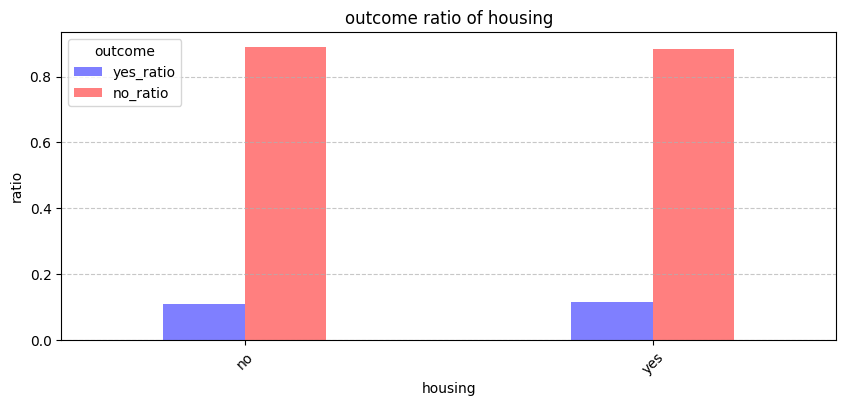

In [ ]:
# housing ratio

housing_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of housing')
plt.xlabel('housing')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 8 loan

<Figure size 1000x600 with 0 Axes>

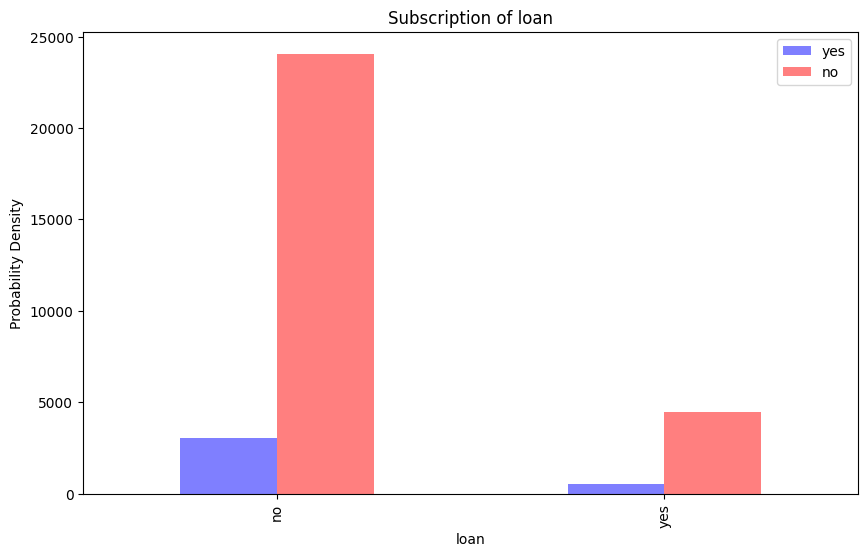

In [ ]:
#loan count

var = "loan"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of loan')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'loan', count the number of each category
# =======before reindexing=======
loan_total=pd.DataFrame(train['loan'].value_counts())
loan_yes= pd.DataFrame(train[train['y'] == 'yes']['loan'].value_counts(normalize=False))
loan_no=pd.DataFrame(train[train['y'] == 'no']['loan'].value_counts(normalize=False))

# set index with each category of 'loan'
# =======after reindexing=======
loan_total=loan_total.reindex(['no','yes'])
loan_yes=loan_yes.reindex(['no','yes'])
loan_no=loan_no.reindex(['no','yes'])

# =======ratio=======
yes_ratio=loan_yes.div(loan_total)
no_ratio=loan_no.div(loan_total)
loan_ratio=yes_ratio.merge(no_ratio, on='loan')
loan_ratio.columns=['yes_ratio','no_ratio']

print('loan_ratio:\n',loan_ratio,'\n\n')

loan_ratio:
       yes_ratio  no_ratio
loan                     
no     0.113077  0.886923
yes    0.109984  0.890016 




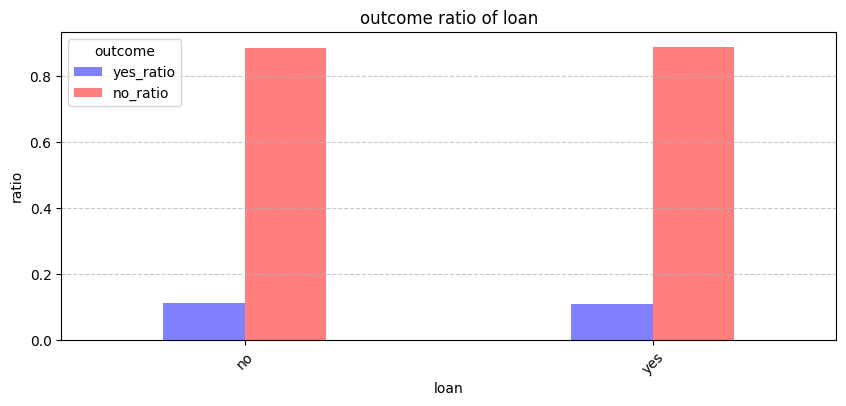

In [ ]:
# loan_ratio

loan_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of loan')
plt.xlabel('loan')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 9 contact

<Figure size 1000x600 with 0 Axes>

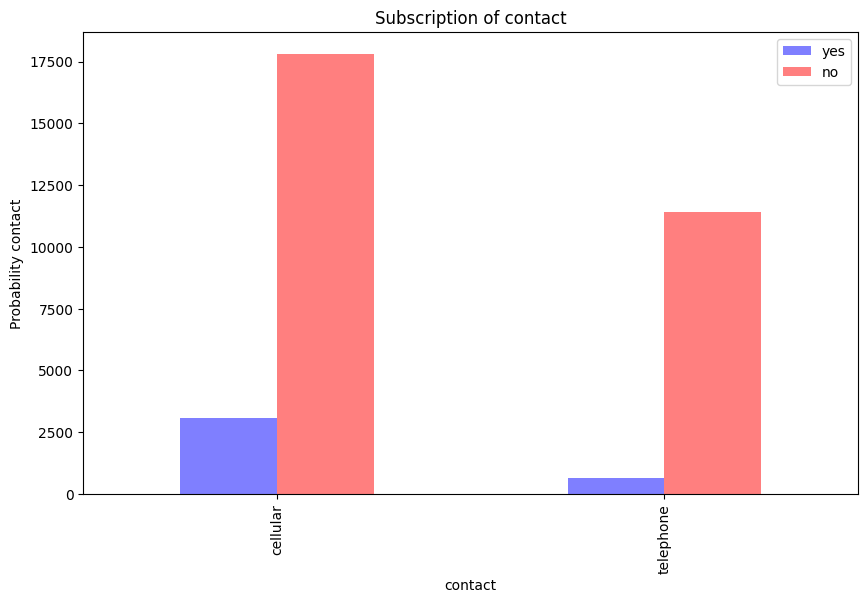

In [ ]:
#contact count

var = "contact"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of contact')
plt.xlabel(var)
plt.ylabel("Probability contact")
plt.legend()
plt.show()


In [ ]:
# for 'contact', count the number of each category
# =======before reindexing=======
contact_total=pd.DataFrame(train['contact'].value_counts())
contact_yes= pd.DataFrame(train[train['y'] == 'yes']['contact'].value_counts(normalize=False))
contact_no=pd.DataFrame(train[train['y'] == 'no']['contact'].value_counts(normalize=False))

# set index with each category of 'contact'
# =======after reindexing=======
contact_total=contact_total.reindex(['cellular','telephone'])
contact_yes=contact_yes.reindex(['cellular','telephone'])
contact_no=contact_no.reindex(['cellular','telephone'])

# =======ratio=======
yes_ratio=contact_yes.div(contact_total)
no_ratio=contact_no.div(contact_total)
contact_ratio=yes_ratio.merge(no_ratio, on='contact')
contact_ratio.columns=['yes_ratio','no_ratio']

print('contact_ratio:\n',contact_ratio,'\n\n')

contact_ratio:
            yes_ratio  no_ratio
contact                       
cellular    0.147249  0.852751
telephone   0.052789  0.947211 




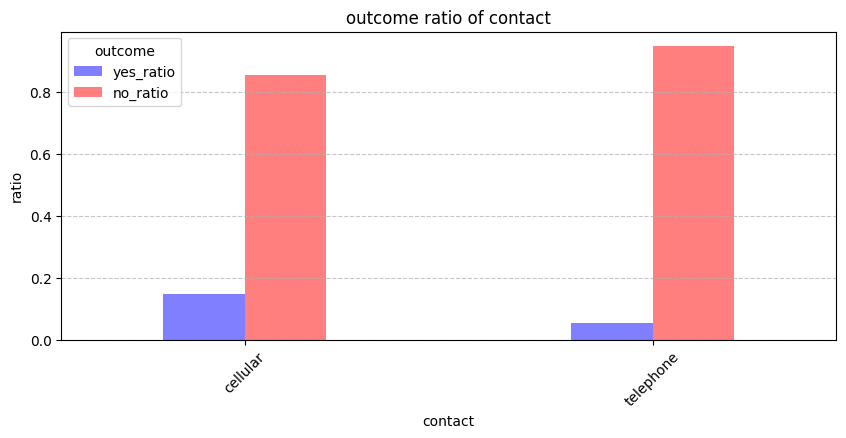

In [ ]:
# contact ratio

contact_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of contact')
plt.xlabel('contact')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 10 month

<Figure size 1000x600 with 0 Axes>

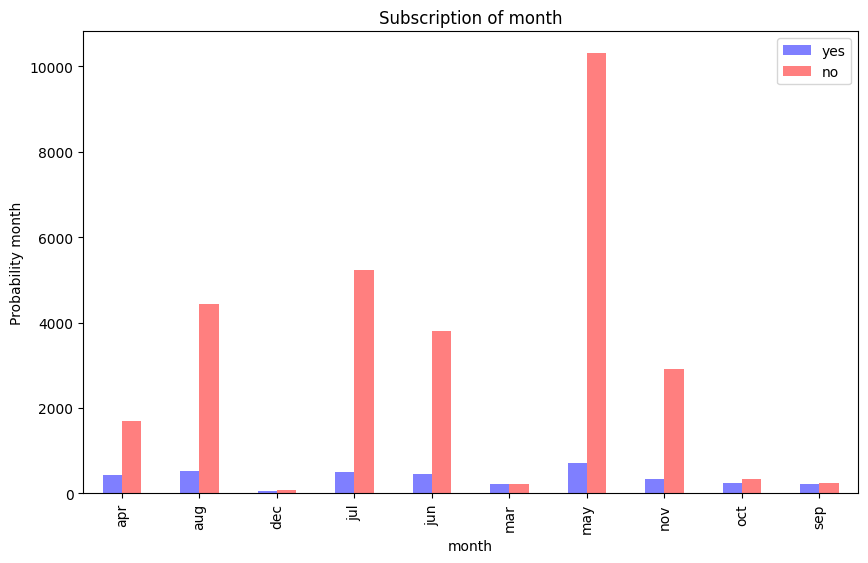

In [ ]:
#month count

var = "month"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar",stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of month')
plt.xlabel(var)
plt.ylabel("Probability month")
plt.legend()
plt.show()


In [ ]:
# for 'month', count the number of each category
# =======before reindexing=======
month_total=pd.DataFrame(train['month'].value_counts())
month_yes= pd.DataFrame(train[train['y'] == 'yes']['month'].value_counts(normalize=False))
month_no=pd.DataFrame(train[train['y'] == 'no']['month'].value_counts(normalize=False))

# set index with each category of 'month'
# =======after reindexing=======
month_total=month_total.reindex(['apr','aug','dec','jul','jun','mar','may','nov','oct','sep'])
month_yes=month_yes.reindex(['apr','aug','dec','jul','jun','mar','may','nov','oct','sep'])
month_no=month_no.reindex(['apr','aug','dec','jul','jun','mar','may','nov','oct','sep'])

# =======ratio=======
yes_ratio=month_yes.div(month_total)
no_ratio=month_no.div(month_total)
month_ratio=yes_ratio.merge(no_ratio, on='month')
month_ratio.columns=['yes_ratio','no_ratio']

print('month_ratio:\n',month_ratio,'\n\n')

month_ratio:
        yes_ratio  no_ratio
month                     
apr     0.203302  0.796698
aug     0.104529  0.895471
dec     0.455172  0.544828
jul     0.087063  0.912937
jun     0.107562  0.892438
mar     0.500000  0.500000
may     0.065300  0.934700
nov     0.103523  0.896477
oct     0.432014  0.567986
sep     0.470067  0.529933 




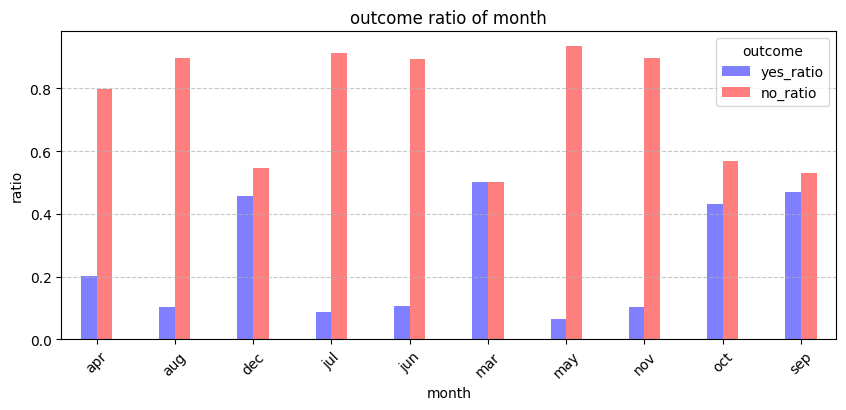

In [ ]:
# month ratio

month_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of month')
plt.xlabel('month')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 11 day_of_week

<Figure size 1000x600 with 0 Axes>

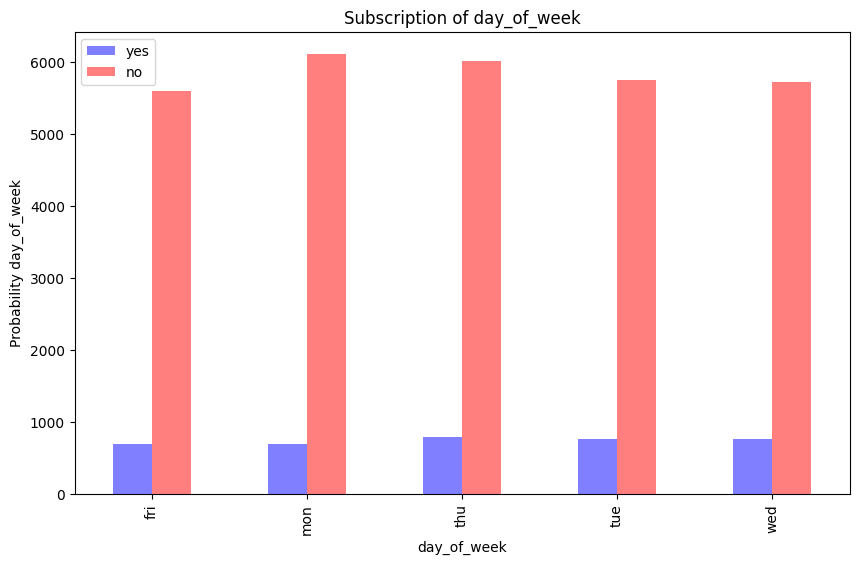

In [ ]:
#day_of_week_count

var = "day_of_week"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar",stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of day_of_week')
plt.xlabel(var)
plt.ylabel("Probability day_of_week")
plt.legend()
plt.show()

In [ ]:
# for 'day_of_week', count the number of each category
# =======before reindexing=======
day_total=pd.DataFrame(train['day_of_week'].value_counts())
day_yes= pd.DataFrame(train[train['y'] == 'yes']['day_of_week'].value_counts(normalize=False))
day_no=pd.DataFrame(train[train['y'] == 'no']['day_of_week'].value_counts(normalize=False))

# set index with each category of 'day_of_week'
# =======after reindexing=======
day_total=day_total.reindex(['fri','mon','thu','tue','wed'])
day_yes=day_yes.reindex(['fri','mon','thu','tue','wed'])
day_no=day_no.reindex(['fri','mon','thu','tue','wed'])

# =======ratio=======
yes_ratio=day_yes.div(day_total)
no_ratio=day_no.div(day_total)
day_ratio=yes_ratio.merge(no_ratio, on='day_of_week')
day_ratio.columns=['yes_ratio','no_ratio']

print('day_ratio:\n',day_ratio,'\n\n')

day_ratio:
              yes_ratio  no_ratio
day_of_week                     
fri           0.110564  0.889436
mon           0.100940  0.899060
thu           0.116698  0.883302
tue           0.117476  0.882524
wed           0.117864  0.882136 




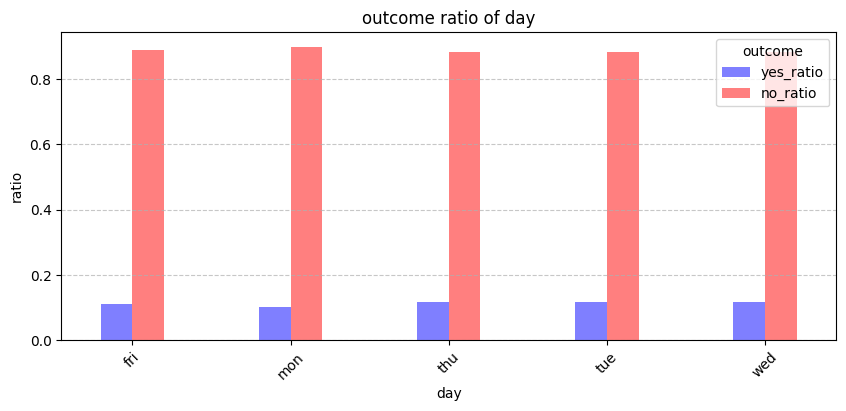

In [ ]:
# day_of_week ratio

day_ratio.plot(kind='bar',figsize=(10, 4), stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of day')
plt.xlabel('day')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 12 campaign

<Figure size 1000x600 with 0 Axes>

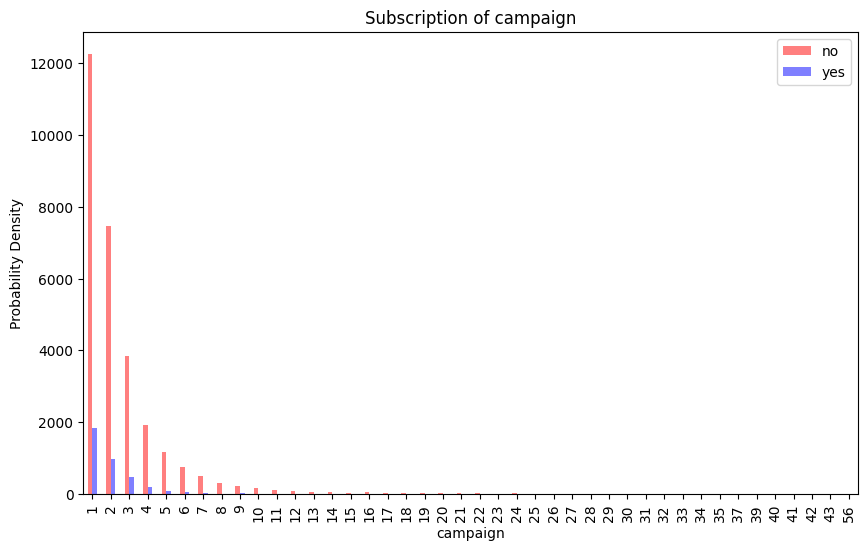

In [ ]:
# campaign

var = "campaign"
target="y"
bins = 20
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts.plot(kind="bar", stacked=False, figsize=(10,6), color=["red", "blue"], alpha=0.5)

plt.title('Subscription of campaign')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'campaign', count the number of each category
# =======before reindexing=======
camp=train['campaign']
camp_y=pd.DataFrame(train['y']).join(camp)

camp_total=pd.DataFrame(camp_y['campaign'].value_counts())
camp_yes= pd.DataFrame(camp_y[camp_y['y'] == 'yes']['campaign'].value_counts(normalize=False))
camp_no=pd.DataFrame(camp_y[camp_y['y'] == 'no']['campaign'].value_counts(normalize=False))

# set index with each category of 'campaign'
# =======after reindexing=======
camp_total=camp_total.sort_values('campaign', ascending = True)
camp_yes=camp_yes.sort_values('campaign', ascending = True)
camp_no=camp_no.sort_values('campaign', ascending = True)

# =======ratio=======
yes_ratio=camp_yes.div(camp_total)
no_ratio=camp_no.div(camp_total)
camp_ratio=yes_ratio.merge(no_ratio, on='campaign')
camp_ratio.columns=['yes_ratio','no_ratio']

print('camp_ratio:\n',camp_ratio,'\n\n')

camp_ratio:
           yes_ratio  no_ratio
campaign                     
1          0.129932  0.870068
2          0.115028  0.884972
3          0.106787  0.893213
4          0.095148  0.904852
5          0.075531  0.924469
6          0.077210  0.922790
7          0.061185  0.938815
8          0.035144  0.964856
9          0.060606  0.939394
10         0.059459  0.940541
11         0.085271  0.914729
12         0.021053  0.978947
13         0.029851  0.970149
14         0.020833  0.979167
15         0.047619  0.952381
16              NaN  1.000000
17         0.088889  0.911111
18              NaN  1.000000
19              NaN  1.000000
20              NaN  1.000000
21              NaN  1.000000
22              NaN  1.000000
23         0.083333  0.916667
24              NaN  1.000000
25              NaN  1.000000
26              NaN  1.000000
27              NaN  1.000000
28              NaN  1.000000
29              NaN  1.000000
30              NaN  1.000000
31              NaN  1.0000

<Figure size 1000x600 with 0 Axes>

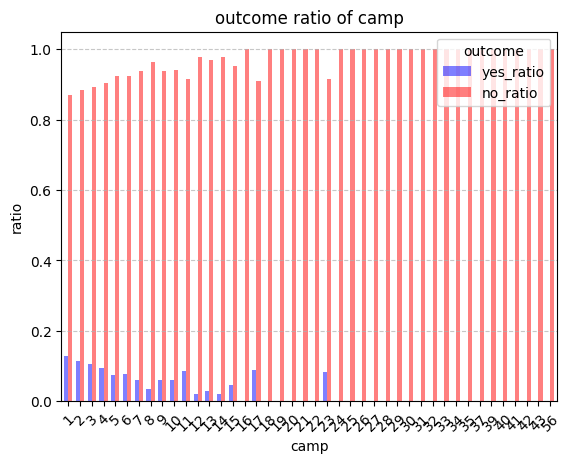

In [ ]:
# campaign ratio

plt.figure(figsize=(10, 6))

camp_ratio.plot(kind='bar', stacked=False, width=0.7, color=['blue','red'],alpha=0.5)
plt.title('outcome ratio of camp')
plt.xlabel('camp')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 13 pdays

In [ ]:
p_train = train[train['pdays'] != 999]
len(p_train)

1214

In [ ]:
_train = train[train['pdays'] == 999]
len(_train)

31736

### 14 previous

<Figure size 1000x600 with 0 Axes>

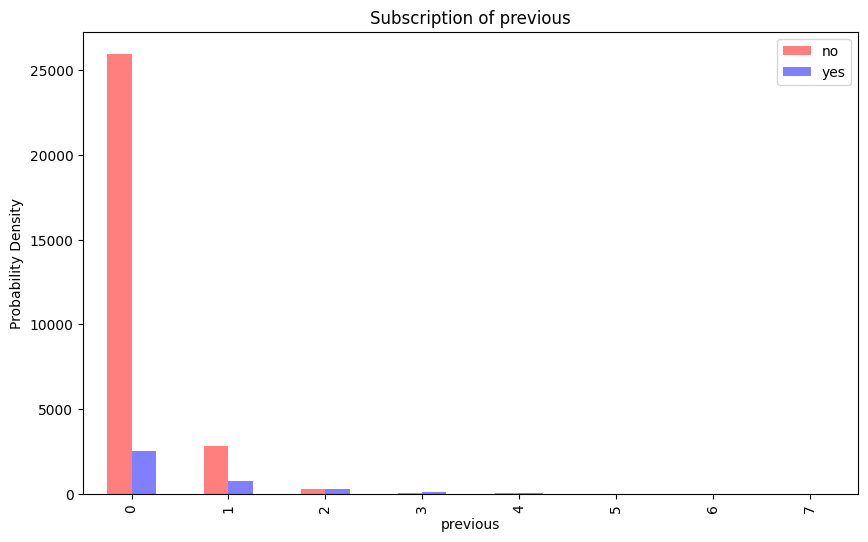

In [ ]:
# previous count

var = "previous"
target="y"
bins = 20
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts.plot(kind="bar", stacked=False, figsize=(10,6), color=["red", "blue"], alpha=0.5)

plt.title('Subscription of previous')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# for 'previous', count the number of each category
# =======before reindexing=======
prev=train['previous']
prev_y=pd.DataFrame(train['y']).join(prev)

prev_total=pd.DataFrame(prev_y['previous'].value_counts())
prev_yes= pd.DataFrame(prev_y[prev_y['y'] == 'yes']['previous'].value_counts(normalize=False))
prev_no=pd.DataFrame(prev_y[prev_y['y'] == 'no']['previous'].value_counts(normalize=False))

# set index with each category of 'previous'
# =======after reindexing=======
prev_total=prev_total.sort_values('previous', ascending = True)
prev_yes=prev_yes.sort_values('previous', ascending = True)
prev_no=prev_no.sort_values('previous', ascending = True)

# =======ratio=======
yes_ratio=prev_yes.div(prev_total)
no_ratio=prev_no.div(prev_total)
prev_ratio=yes_ratio.merge(no_ratio, on='previous')
prev_ratio.columns=['yes_ratio','no_ratio']

print('prev_ratio:\n',prev_ratio,'\n\n')

prev_ratio:
           yes_ratio  no_ratio
previous                     
0          0.087940  0.912060
1          0.213458  0.786542
2          0.473684  0.526316
3          0.585635  0.414365
4          0.593220  0.406780
5          0.733333  0.266667
6          0.600000  0.400000
7               NaN  1.000000 




<Figure size 1000x600 with 0 Axes>

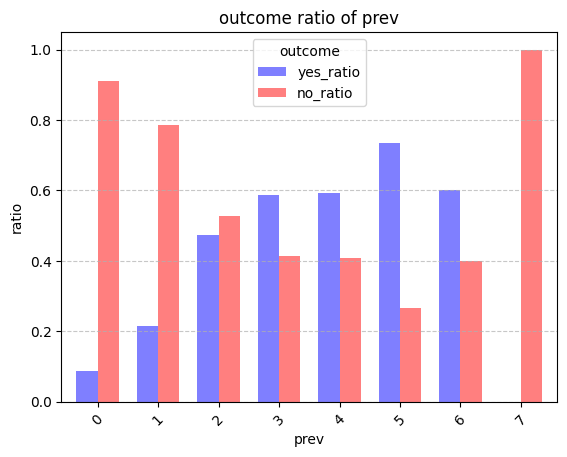

In [ ]:
# previous ratio

plt.figure(figsize=(10, 6))

prev_ratio.plot(kind='bar', stacked=False, width=0.7, color=['blue','red'],alpha=0.5)
plt.title('outcome ratio of prev')
plt.xlabel('prev')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 15 poutcome

<Figure size 1000x600 with 0 Axes>

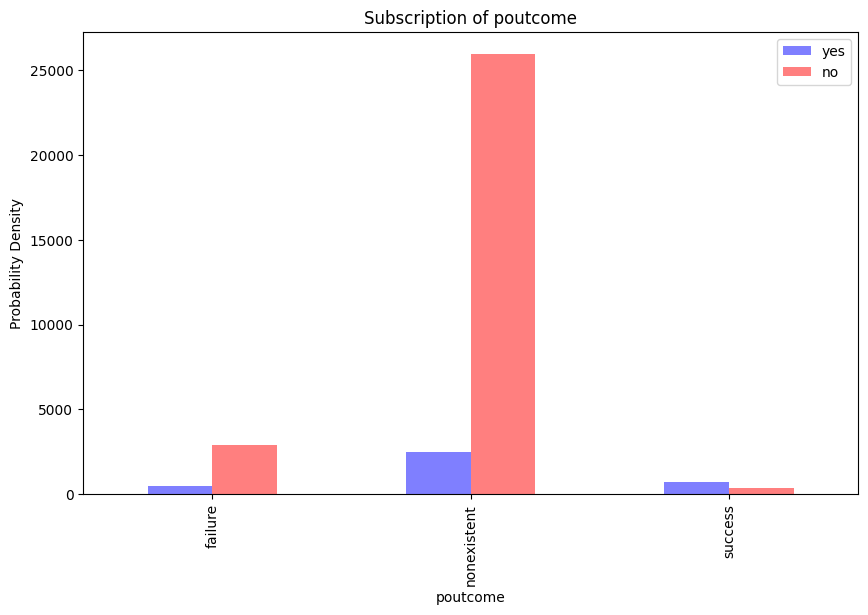

In [ ]:
# poutcome count

var = "poutcome"
target = "y"
bins = 30
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))
var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts[['yes', 'no']].plot(kind="bar", stacked=False, figsize=(10,6), color=["blue", "red"], alpha=0.5)

plt.title('Subscription of poutcome')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [ ]:
# for 'poutcome', count the number of each category
# =======before reindexing=======
poutcome_total=pd.DataFrame(train['poutcome'].value_counts())
poutcome_yes= pd.DataFrame(train[train['y'] == 'yes']['poutcome'].value_counts(normalize=False))
poutcome_no=pd.DataFrame(train[train['y'] == 'no']['poutcome'].value_counts(normalize=False))

# set index with each category of 'poutcome'
# =======after reindexing=======
poutcome_total=poutcome_total.reindex(['failure','nonexistent','success'])
poutcome_yes=poutcome_yes.reindex(['failure','nonexistent','success'])
poutcome_no=poutcome_no.reindex(['failure','nonexistent','success'])

# =======ratio=======
yes_ratio=poutcome_yes.div(poutcome_total)
no_ratio=poutcome_no.div(poutcome_total)
poutcome_ratio=yes_ratio.merge(no_ratio, on='poutcome')
poutcome_ratio.columns=['yes_ratio','no_ratio']

print('poutcome_ratio:\n',poutcome_ratio,'\n\n')

poutcome_ratio:
              yes_ratio  no_ratio
poutcome                        
failure       0.144382  0.855618
nonexistent   0.087940  0.912060
success       0.653672  0.346328 




<Figure size 1000x600 with 0 Axes>

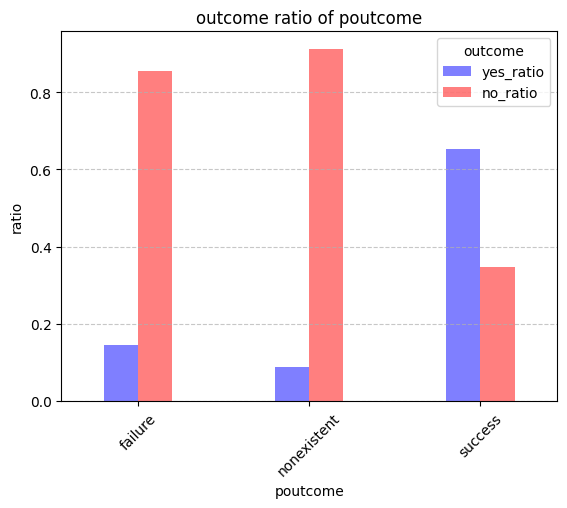

In [ ]:
#poutcome ratio

plt.figure(figsize=(10, 6))

poutcome_ratio.plot(kind='bar', stacked=False, width=0.4, color=['blue','red'],alpha=0.5)

plt.title('outcome ratio of poutcome')
plt.xlabel('poutcome')
plt.ylabel('ratio')
plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 16 emp.var.rate

<Figure size 1000x600 with 0 Axes>

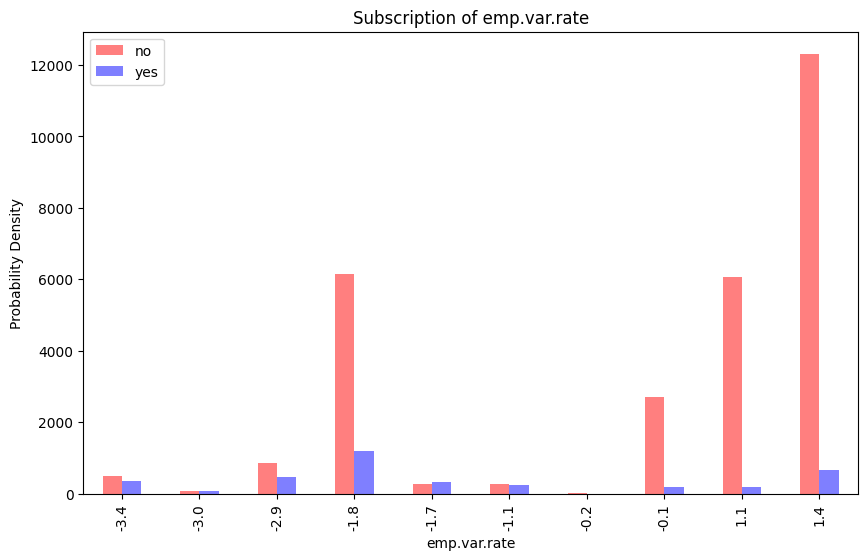

In [ ]:
# emp.var.rate count

var = "emp.var.rate"
target="y"
bins = 20
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts.plot(kind="bar", stacked=False, figsize=(10,6), color=["red", "blue"], alpha=0.5)

plt.title('Subscription of emp.var.rate')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# =======before reindexing=======
emp=train['emp.var.rate']
emp_y=pd.DataFrame(train['y']).join(emp)

emp_total=pd.DataFrame(emp_y['emp.var.rate'].value_counts())
emp_yes= pd.DataFrame(emp_y[emp_y['y'] == 'yes']['emp.var.rate'].value_counts(normalize=False))
emp_no=pd.DataFrame(emp_y[emp_y['y'] == 'no']['emp.var.rate'].value_counts(normalize=False))

# =======after reindexing=======
emp_total=emp_total.sort_values('emp.var.rate', ascending = True)
emp_yes=emp_yes.sort_values('emp.var.rate', ascending = True)
emp_no=emp_no.sort_values('emp.var.rate', ascending = True)

# =======ratio=======
yes_ratio=emp_yes.div(emp_total)
no_ratio=emp_no.div(emp_total)
emp_ratio=yes_ratio.merge(no_ratio, on='emp.var.rate')
emp_ratio.columns=['yes_ratio','no_ratio']

print('emp_ratio:\n',emp_ratio,'\n\n')

emp_ratio:
               yes_ratio  no_ratio
emp.var.rate                     
-3.4           0.422584  0.577416
-3.0           0.477941  0.522059
-2.9           0.349028  0.650972
-1.8           0.161334  0.838666
-1.7           0.536585  0.463415
-1.1           0.484127  0.515873
-0.2           0.111111  0.888889
-0.1           0.065749  0.934251
 1.1           0.030104  0.969896
 1.4           0.052178  0.947822 




<Figure size 1000x600 with 0 Axes>

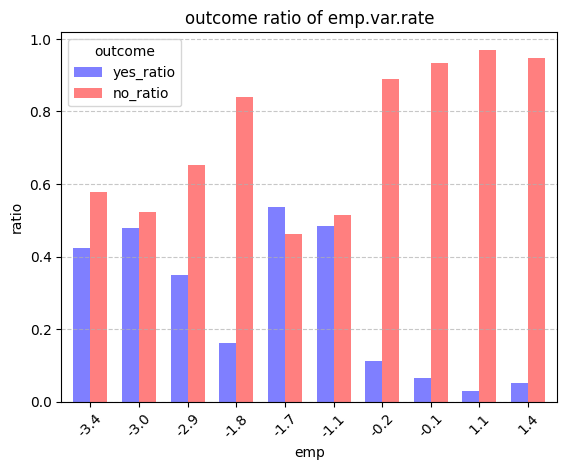

In [ ]:
# emp.var.rate ratio

plt.figure(figsize=(10, 6))

emp_ratio.plot(kind='bar', stacked=False, width=0.7, color=['blue','red'],alpha=0.5)
plt.title('outcome ratio of emp.var.rate')
plt.xlabel('emp')
plt.ylabel('ratio')

plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 18 cons.conf.idx

<Figure size 1000x400 with 0 Axes>

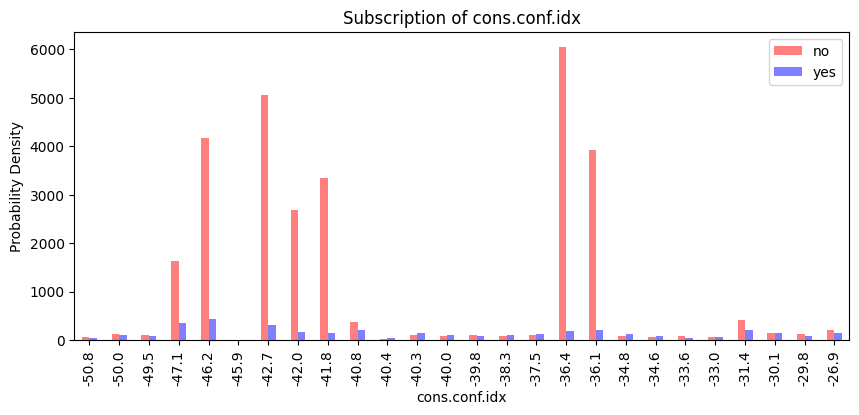

In [ ]:
# cons.conf.idx

var = "cons.conf.idx"
target="y"
bins = 20
density = True
alpha = 0.3

plt.figure(figsize=(10, 4))

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts.plot(kind="bar", stacked=False, figsize=(10,4), color=["red", "blue"], alpha=0.5)

plt.title('Subscription of cons.conf.idx')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# =======before reindexing=======
conf=train['cons.conf.idx']
conf_y=pd.DataFrame(train['y']).join(conf)

conf_total=pd.DataFrame(conf_y['cons.conf.idx'].value_counts())
conf_yes= pd.DataFrame(conf_y[conf_y['y'] == 'yes']['cons.conf.idx'].value_counts(normalize=False))
conf_no=pd.DataFrame(conf_y[conf_y['y'] == 'no']['cons.conf.idx'].value_counts(normalize=False))

# =======after reindexing=======
conf_total=conf_total.sort_values('cons.conf.idx', ascending = True)
conf_yes=conf_yes.sort_values('cons.conf.idx', ascending = True)
conf_no=conf_no.sort_values('cons.conf.idx', ascending = True)

# =======ratio=======
yes_ratio=conf_yes.div(conf_total)
no_ratio=conf_no.div(conf_total)
conf_ratio=yes_ratio.merge(no_ratio, on='cons.conf.idx')
conf_ratio.columns=['yes_ratio','no_ratio']

print('conf_ratio:\n',conf_ratio,'\n\n')

conf_ratio:
                yes_ratio  no_ratio
cons.conf.idx                     
-50.8           0.460000  0.540000
-50.0           0.449153  0.550847
-49.5           0.453488  0.546512
-47.1           0.176174  0.823826
-46.2           0.093064  0.906936
-45.9           0.111111  0.888889
-42.7           0.059032  0.940968
-42.0           0.054405  0.945595
-41.8           0.043865  0.956135
-40.8           0.371330  0.628670
-40.4           0.642857  0.357143
-40.3           0.584746  0.415254
-40.0           0.571429  0.428571
-39.8           0.471204  0.528796
-38.3           0.542553  0.457447
-37.5           0.517241  0.482759
-36.4           0.030104  0.969896
-36.1           0.050290  0.949710
-34.8           0.557692  0.442308
-34.6           0.589928  0.410072
-33.6           0.328467  0.671533
-33.0           0.477941  0.522059
-31.4           0.332797  0.667203
-30.1           0.466899  0.533101
-29.8           0.420091  0.579909
-26.9           0.388102  0.611898 




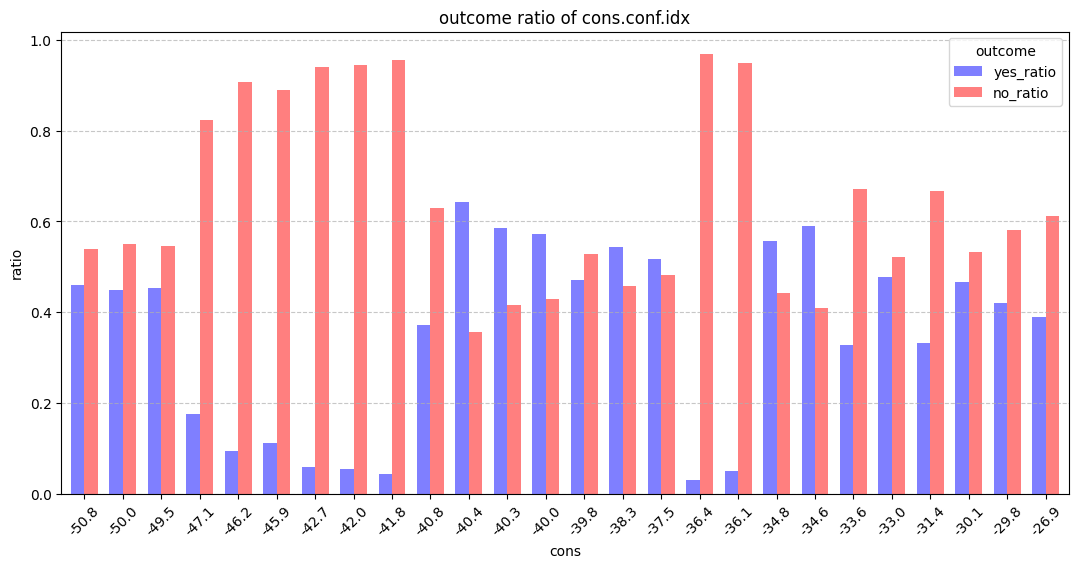

In [ ]:
# cons.conf.idx ratio

conf_ratio.plot(kind='bar', figsize=(13, 6),stacked=False, width=0.7, color=['blue','red'],alpha=0.5)
plt.title('outcome ratio of cons.conf.idx')
plt.xlabel('cons')
plt.ylabel('ratio')


plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 20 nr.employed

<Figure size 1000x600 with 0 Axes>

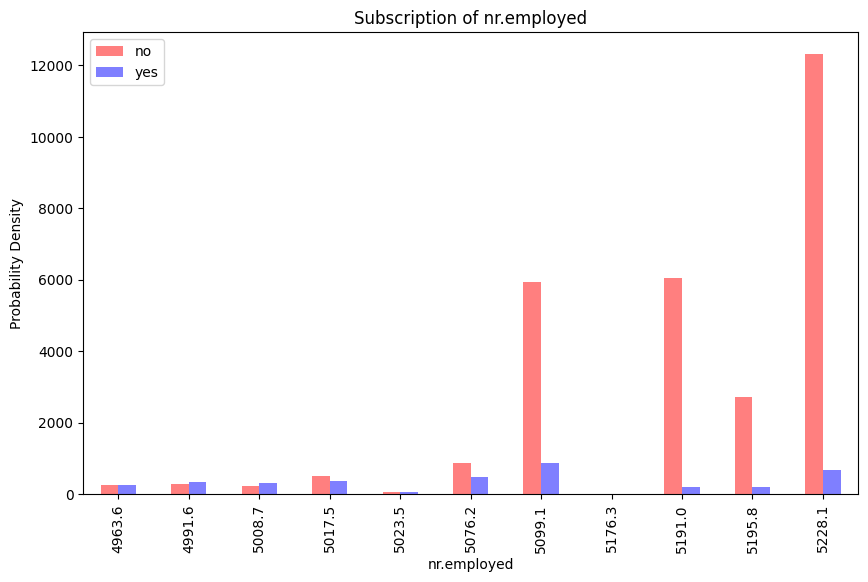

In [ ]:
# nr.employed

var = "nr.employed"
target="y"
bins = 20
density = True
alpha = 0.3

plt.figure(figsize=(10, 6))

var_counts = train.groupby(target)[var].value_counts(normalize=False).unstack().transpose()
var_counts.plot(kind="bar", stacked=False, figsize=(10,6), color=["red", "blue"], alpha=0.5)

plt.title('Subscription of nr.employed')
plt.xlabel(var)
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [ ]:
# =======before reindexing=======
employed=train['nr.employed']
employed_y=pd.DataFrame(train['y']).join(employed)

employed_total=pd.DataFrame(employed_y['nr.employed'].value_counts())
employed_yes= pd.DataFrame(employed_y[conf_y['y'] == 'yes']['nr.employed'].value_counts(normalize=False))
employed_no=pd.DataFrame(employed_y[conf_y['y'] == 'no']['nr.employed'].value_counts(normalize=False))

# =======after reindexing=======
employed_total=employed_total.sort_values('nr.employed', ascending = True)
employed_yes=employed_yes.sort_values('nr.employed', ascending = True)
employed_no=employed_no.sort_values('nr.employed', ascending = True)

# =======ratio=======
yes_ratio=employed_yes.div(employed_total)
no_ratio=employed_no.div(employed_total)
employed_ratio=yes_ratio.merge(no_ratio, on='nr.employed')
employed_ratio.columns=['yes_ratio','no_ratio']

print('employed_ratio:\n',employed_ratio,'\n\n')

employed_ratio:
              yes_ratio  no_ratio
nr.employed                     
4963.6        0.484127  0.515873
4991.6        0.536585  0.463415
5008.7        0.570888  0.429112
5017.5        0.422584  0.577416
5023.5        0.477941  0.522059
5076.2        0.349028  0.650972
5099.1        0.129548  0.870452
5176.3        0.111111  0.888889
5191.0        0.030104  0.969896
5195.8        0.065749  0.934251
5228.1        0.052178  0.947822 




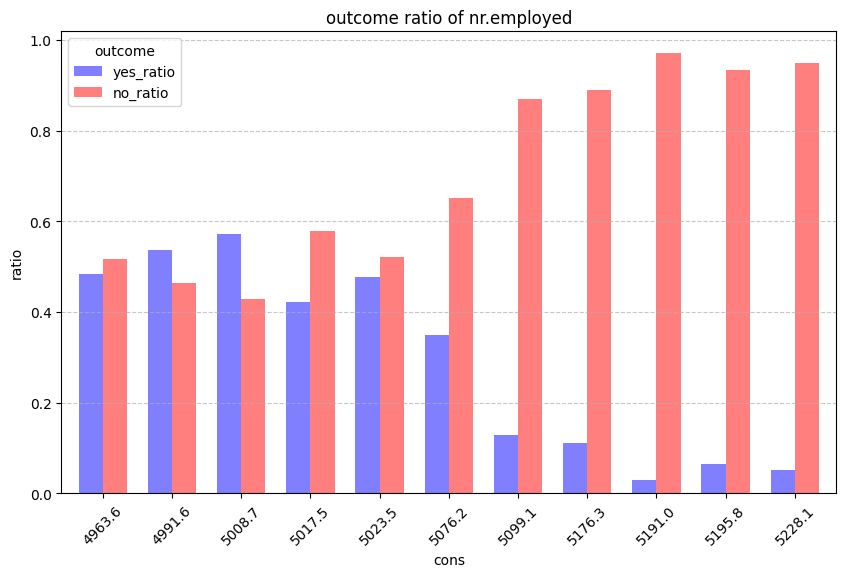

In [ ]:
# nr.employed ratio

employed_ratio.plot(kind='bar',figsize=(10, 6), stacked=False, width=0.7, color=['blue','red'],alpha=0.5)
plt.title('outcome ratio of nr.employed')
plt.xlabel('cons')
plt.ylabel('ratio')


plt.xticks(rotation=45)
plt.legend(title='outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## visualization_heatmap

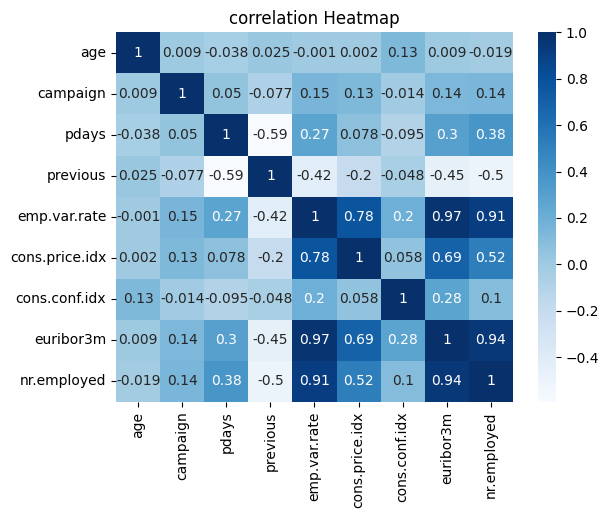

In [ ]:
# check correlation between all numerical variables

train.drop('id', axis = 1, inplace = True)
continuous_data = train.select_dtypes(include=['float64','int64'])
correlation_matrix=continuous_data.corr()
correlation_matrix_rounded = correlation_matrix.round(3)
sns.heatmap(correlation_matrix_rounded, annot=True, cmap='Blues')
plt.title('correlation Heatmap')
plt.show()

## hypothesis & verification

### hypothesis 1
>Housing loan and loan will be proportional

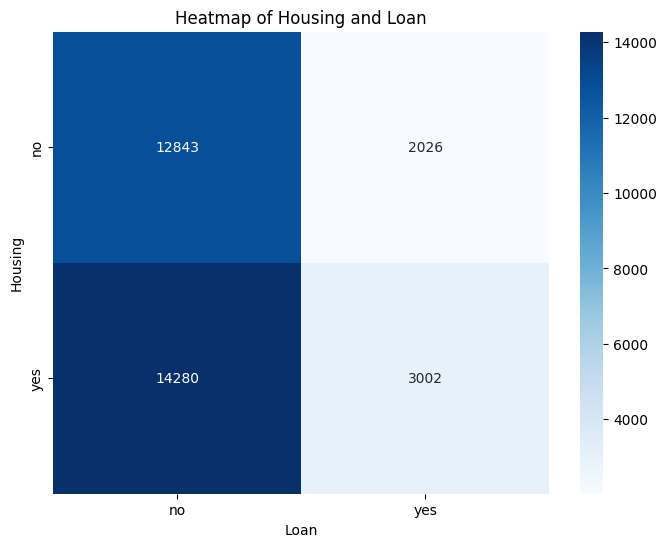

In [ ]:
# create a pivot table of housing loan and loan
pivot_table = train.pivot_table(index='housing', columns='loan', aggfunc='size')

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Housing and Loan')
plt.xlabel('Loan')
plt.ylabel('Housing')
plt.show()

### hypothesis 2
>There should be a difference in the degree of acceptance of contact depending on the month

{'nov', 'sep', 'apr', 'oct', 'aug', 'dec', 'jun', 'may', 'mar', 'jul'}


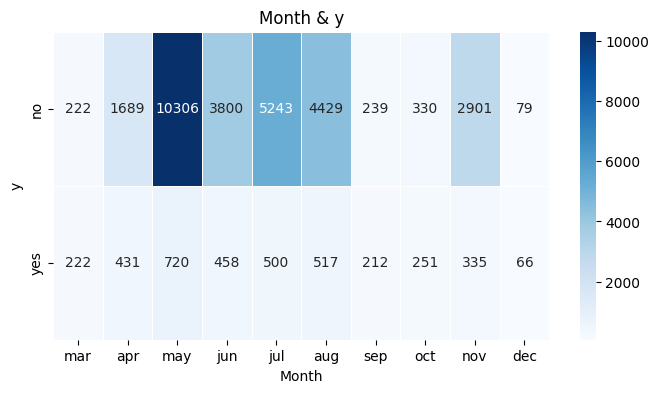

In [ ]:
month_list=train['month'].tolist()
y_list=train['y'].tolist()
print(set(month_list)) # no jan, feb

data4={'month':month_list, 'y':y_list}
df4=pd.DataFrame(data4)

df4['month']=pd.Categorical(df4['month'], categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
cross_tab4=pd.crosstab(df4['y'], df4['month'])

plt.figure(figsize=(8,4))
sns.heatmap(cross_tab4, annot=True, cmap='Blues', cbar=True, fmt='d', linewidths=.5)

plt.title('Month & y')
plt.xlabel('Month')
plt.ylabel('y')

plt.show()

# preprocessing

## drop

In [ ]:
print(train.isnull().sum())

age                  0
job                257
marital             62
education         1388
default           6853
housing            799
loan               799
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


## explore outlier & remove outlier

### explore outlier with boxplot

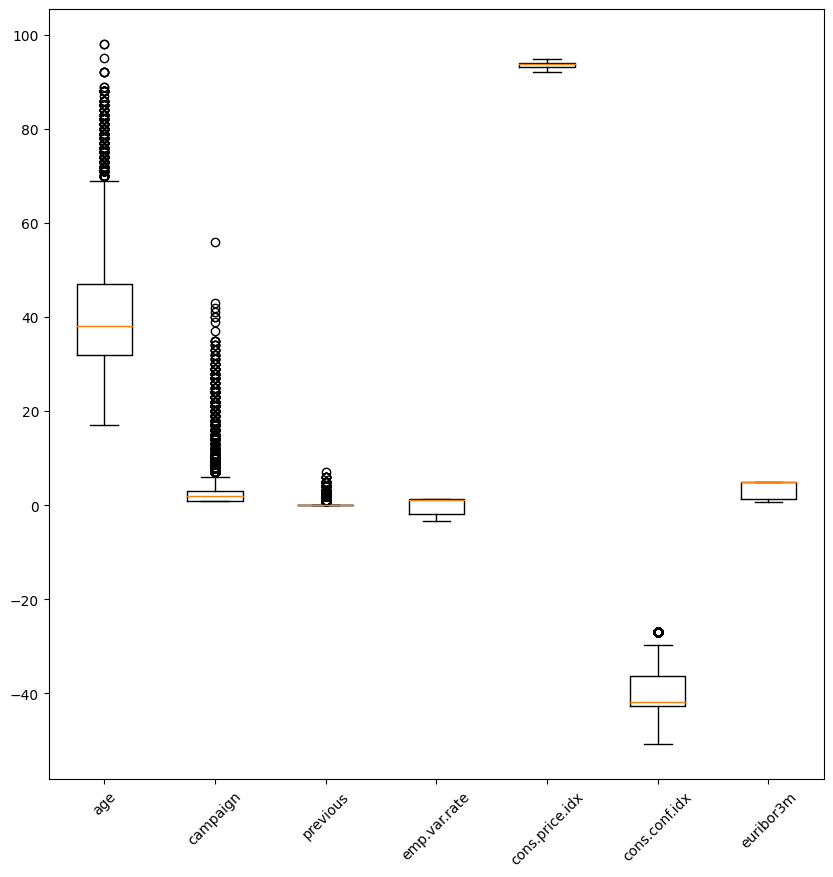

In [ ]:
plt.figure(figsize = (10, 10))
plt.boxplot([train['age'], train['campaign'], train['previous'], train['emp.var.rate'], train['cons.price.idx'], train['cons.conf.idx'], train['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 45)
plt.show()

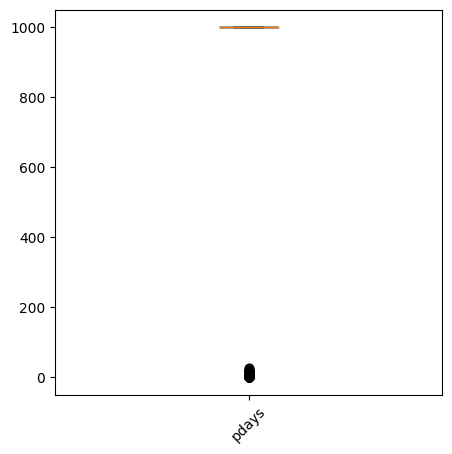

In [ ]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['pdays'])
plt.xticks(ticks = range(1, 2), labels = ['pdays'], rotation = 45)
plt.show()

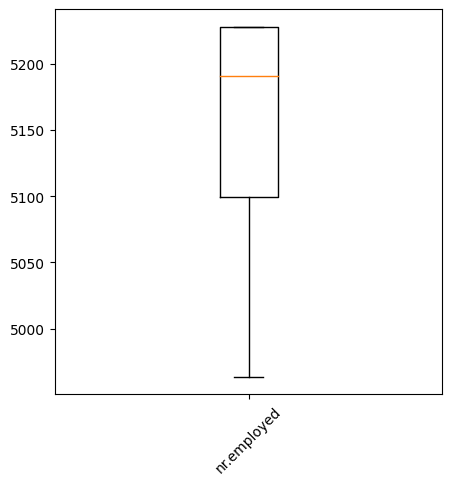

In [ ]:
plt.figure(figsize = (5, 5))
plt.boxplot(train['nr.employed'])
plt.xticks(ticks = range(1, 2), labels = ['nr.employed'], rotation = 45)
plt.show()

### remove outlier

In [ ]:
def remove_outliers_box(data, columns):

    data_df = data.copy()

    for col in columns:

        Q1 = data_df[col].quantile(0.25)
        Q3 = data_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        max_value = data_df.loc[(data_df[col] >= lower_bound) & (data_df[col] <= upper_bound), col].max()
        data_df.loc[(data_df[col] <= lower_bound) | (data_df[col] >= upper_bound), col] = max_value

    return data_df

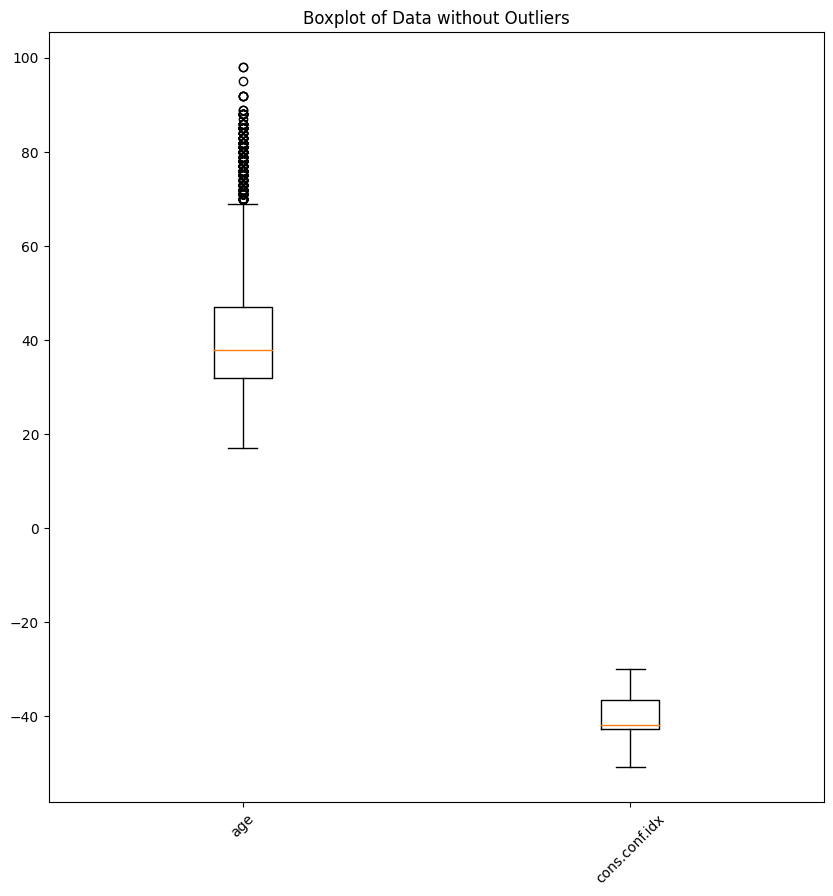

In [ ]:
cleaned_data = remove_outliers_box(train, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot(cleaned_data['cons.conf.idx'].values)
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'], rotation=45)
plt.title('Boxplot of Data without Outliers')
plt.show()


In [ ]:
train = cleaned_data
train['age'] = train['age'].astype(int)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
32946,56,NaN,single,basic.9y,no,no,yes,cellular,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,55,admin.,married,high.school,no,yes,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32948,34,services,married,high.school,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no


## fill nan

### fill nan proportionally

In [ ]:
job_total=pd.DataFrame(train['job'].value_counts())

job_dict = {job: 0 for job in train['job'].unique() if job != 'nan'}

for job in train['job'].unique():
  train_ = train[train['job'] == job]
  job_dict[job] = len(train_) / len(train['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

{'admin.': '0.25', 'technician': '0.16', 'services': '0.10', 'retired': '0.04', 'entrepreneur': '0.04', 'blue-collar': '0.22', 'unemployed': '0.02', 'student': '0.02', 'self-employed': '0.03', 'management': '0.07', 'housemaid': '0.03', nan: '0.00'}


In [ ]:
job_null = train['job'].isnull().sum()

job_count = {job: 0 for job in train['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '64.25', 'technician': '41.12', 'services': '25.70', 'retired': '10.28', 'entrepreneur': '10.28', 'blue-collar': '56.54', 'unemployed': '5.14', 'student': '5.14', 'self-employed': '7.71', 'management': '17.99', 'housemaid': '7.71', nan: '0.00'}


In [ ]:
train_job_null = train[train['job'].isna()]

train_job_null.iloc[0:65, 1] = 'admin.'
train_job_null.iloc[65:107, 1] = 'technician'
train_job_null.iloc[107:134, 1] = 'services'
train_job_null.iloc[134:144, 1] = 'retired'
train_job_null.iloc[144:154, 1] = 'entrepreneur'
train_job_null.iloc[154:212, 1] = 'blue-collar'
train_job_null.iloc[212:217, 1] = 'unemployed'
train_job_null.iloc[217:222, 1] = 'student'
train_job_null.iloc[222:230, 1] = 'self-employed'
train_job_null.iloc[230:249, 1] = 'management'
train_job_null.iloc[249:257, 1] = 'housemaid'

train_job_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
161,32,admin.,single,professional.course,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
560,49,admin.,married,basic.6y,no,no,no,telephone,jun,wed,9,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
656,36,admin.,single,basic.6y,NaN,no,no,telephone,jun,wed,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes
702,47,admin.,married,NaN,NaN,yes,no,cellular,aug,tue,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
806,33,admin.,married,NaN,NaN,no,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32456,53,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
32549,44,housemaid,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32711,48,housemaid,married,NaN,NaN,yes,no,cellular,jul,mon,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32822,60,housemaid,married,university.degree,no,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [ ]:
train = train.dropna(subset = ['job'])
train = pd.concat([train, train_job_null], axis = 0, ignore_index = True)

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,53,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
32946,44,housemaid,single,basic.9y,NaN,NaN,NaN,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,48,housemaid,married,NaN,NaN,yes,no,cellular,jul,mon,7,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,60,housemaid,married,university.degree,no,yes,no,telephone,jun,mon,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [ ]:
marital_total=pd.DataFrame(train['marital'].value_counts())

marital_dict = {i: 0 for i in train['marital'].unique()}

for i in train['marital'].unique():
  train_ = train[train['marital'] == i]
  marital_dict[i] = len(train_) / len(train['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

{'married': '0.61', 'single': '0.28', 'divorced': '0.11', nan: '0.00'}


In [ ]:
marital_null = train['marital'].isnull().sum()

marital_count = {i: 0 for i in train['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '37.82', 'single': '17.36', 'divorced': '6.82', nan: '0.00'}


In [ ]:
train_marital_null = train[train['marital'].isna()]

train_marital_null.iloc[0:38, 2] = 'married'
train_marital_null.iloc[38:55, 2] = 'single'
train_marital_null.iloc[55:62, 2] = 'divorced'

train_marital_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
114,34,admin.,married,university.degree,no,yes,yes,cellular,may,mon,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
708,50,unemployed,married,basic.9y,no,yes,yes,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
1032,36,admin.,married,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
1098,49,unemployed,married,high.school,no,yes,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
2580,34,admin.,married,university.degree,no,yes,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32768,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32778,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32788,49,technician,divorced,NaN,NaN,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32857,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [ ]:
train = train.dropna(subset = ['marital'])
train = pd.concat([train, train_marital_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,NaN,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,NaN,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [ ]:
train['default'] = train['default'].fillna('no')
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,32,technician,divorced,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
32946,41,technician,divorced,NaN,no,yes,no,cellular,jul,mon,13,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32947,49,technician,divorced,NaN,no,yes,yes,cellular,jul,mon,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
32948,45,blue-collar,divorced,NaN,no,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,yes


In [ ]:
loan_total=pd.DataFrame(train['loan'].value_counts())

loan_dict = {i: 0 for i in train['loan'].unique()}

for i in train['loan'].unique():
  train_ = train[train['loan'] == i]
  loan_dict[i] = len(train_) / len(train['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

{'no': '0.82', 'yes': '0.15', nan: '0.00'}


In [ ]:
loan_null = train['loan'].isnull().sum()

loan_count = {i: 0 for i in train['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '655.18', 'yes': '119.85', nan: '0.00'}


In [ ]:
train_loan_null = train[train['loan'].isna()]

train_loan_null.iloc[0:675, 6] = 'no'
train_loan_null.iloc[675:799, 6] = 'yes'

train_loan_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32,55,blue-collar,married,basic.6y,no,NaN,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
56,34,blue-collar,divorced,professional.course,no,NaN,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
69,45,admin.,single,university.degree,no,NaN,no,cellular,nov,tue,3,999,1,failure,-3.4,92.649,-30.1,0.715,5017.5,no
161,35,technician,married,university.degree,no,NaN,no,cellular,aug,thu,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
185,27,self-employed,single,university.degree,no,NaN,no,cellular,aug,mon,2,999,1,failure,-2.9,92.201,-31.4,0.861,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32718,44,technician,married,NaN,no,NaN,yes,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
32772,29,retired,married,university.degree,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32840,45,blue-collar,married,NaN,no,NaN,yes,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
32884,44,housemaid,single,basic.9y,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [ ]:
train = train.dropna(subset = ['loan'])
train = pd.concat([train, train_loan_null], axis = 0, ignore_index = True)
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,admin.,married,high.school,no,no,no,telephone,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
1,32,admin.,married,university.degree,no,yes,yes,cellular,jun,tue,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
2,36,technician,single,university.degree,no,no,no,cellular,aug,fri,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
3,30,services,single,high.school,no,yes,yes,cellular,may,mon,1,999,2,failure,-1.8,92.893,-46.2,1.299,5099.1,no
4,76,retired,divorced,basic.4y,no,no,no,cellular,aug,tue,1,999,1,failure,-1.7,94.027,-38.3,0.886,4991.6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,technician,married,NaN,no,NaN,yes,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
32946,29,retired,married,university.degree,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32947,45,blue-collar,married,NaN,no,NaN,yes,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
32948,44,housemaid,single,basic.9y,no,NaN,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [ ]:
train.isnull().sum()

age                  0
job                  0
marital              0
education         1388
default              0
housing            799
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
train_no_y = train.drop(columns = 'y')
train_copy = train_no_y.copy()

### fill nan with KNN

#### label encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no' 'yes']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [ ]:
train['education'] = train['education'].replace(7, np.nan)
train['housing'] = train['housing'].replace(2, np.nan)

#### knn

In [ ]:
from sklearn.impute import KNNImputer

# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_train = imputer.fit_transform(train)
filled_train = pd.DataFrame(filled_train, columns = train.columns)

In [ ]:
train = filled_train
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,999.0,0.0,1.0,1.4,93.918,-42.7,4.966,5228.1,0.0
1,32.0,0.0,1.0,6.0,0.0,1.0,1.0,0.0,4.0,3.0,1.0,999.0,0.0,1.0,-2.9,92.963,-40.8,1.262,5076.2,1.0
2,36.0,9.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.964,5228.1,0.0
3,30.0,7.0,2.0,3.0,0.0,1.0,1.0,0.0,6.0,1.0,1.0,999.0,2.0,0.0,-1.8,92.893,-46.2,1.299,5099.1,0.0
4,76.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,999.0,1.0,0.0,-1.7,94.027,-38.3,0.886,4991.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44.0,9.0,1.0,4.8,0.0,0.8,1.0,0.0,1.0,3.0,1.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.963,5228.1,0.0
32946,29.0,5.0,1.0,6.0,0.0,0.8,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0
32947,45.0,1.0,1.0,1.6,0.0,0.8,1.0,1.0,6.0,4.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.859,5191.0,0.0
32948,44.0,3.0,2.0,2.0,0.0,0.4,1.0,1.0,6.0,0.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.855,5191.0,0.0


In [ ]:
train['age'] = train['age'].astype(int)
train['job'] = train['job'].astype(int)
train['marital'] = train['marital'].astype(int)
train['education'] = round(train['education']).astype(int)
train['default'] = train['default'].astype(int)
train['housing'] = round(train['housing']).astype(int)
train['loan'] = train['loan'].astype(int)
train['contact'] = train['contact'].astype(int)
train['month'] = train['month'].astype(int)
train['day_of_week'] = train['day_of_week'].astype(int)
train['campaign'] = train['campaign'].astype(int)
train['pdays'] = train['pdays'].astype(int)
train['previous'] = train['previous'].astype(int)
train['poutcome'] = train['poutcome'].astype(int)

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,46,0,1,3,0,0,0,1,3,2,3,999,0,1,1.4,93.918,-42.7,4.966,5228.1,0.0
1,32,0,1,6,0,1,1,0,4,3,1,999,0,1,-2.9,92.963,-40.8,1.262,5076.2,1.0
2,36,9,2,6,0,0,0,0,1,0,5,999,0,1,1.4,93.444,-36.1,4.964,5228.1,0.0
3,30,7,2,3,0,1,1,0,6,1,1,999,2,0,-1.8,92.893,-46.2,1.299,5099.1,0.0
4,76,5,0,0,0,0,0,0,1,3,1,999,1,0,-1.7,94.027,-38.3,0.886,4991.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,9,1,5,0,1,1,0,1,3,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0.0
32946,29,5,1,6,0,1,1,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0.0
32947,45,1,1,2,0,1,1,1,6,4,1,999,0,1,1.1,93.994,-36.4,4.859,5191.0,0.0
32948,44,3,2,2,0,0,1,1,6,0,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0.0


In [ ]:
columns_to_string = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome']
train[columns_to_string] = train[columns_to_string].astype(str)

## feature selection

In [ ]:
data = train.drop(columns = ['pdays', 'y'], axis = 1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,46,0,1,3,0,0,0,1,3,2,3,0,1,1.4,93.918,-42.7,4.966,5228.1
1,32,0,1,6,0,1,1,0,4,3,1,0,1,-2.9,92.963,-40.8,1.262,5076.2
2,36,9,2,6,0,0,0,0,1,0,5,0,1,1.4,93.444,-36.1,4.964,5228.1
3,30,7,2,3,0,1,1,0,6,1,1,2,0,-1.8,92.893,-46.2,1.299,5099.1
4,76,5,0,0,0,0,0,0,1,3,1,1,0,-1.7,94.027,-38.3,0.886,4991.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,9,1,5,0,1,1,0,1,3,1,0,1,1.4,93.444,-36.1,4.963,5228.1
32946,29,5,1,6,0,1,1,1,6,0,2,0,1,1.1,93.994,-36.4,4.855,5191.0
32947,45,1,1,2,0,1,1,1,6,4,1,0,1,1.1,93.994,-36.4,4.859,5191.0
32948,44,3,2,2,0,0,1,1,6,0,2,0,1,1.1,93.994,-36.4,4.855,5191.0


In [ ]:
data=pd.get_dummies(data)
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,46,3,0,1.4,93.918,-42.7,4.966,5228.1,True,False,...,False,False,False,False,True,False,False,False,True,False
1,32,1,0,-2.9,92.963,-40.8,1.262,5076.2,True,False,...,False,False,False,False,False,True,False,False,True,False
2,36,5,0,1.4,93.444,-36.1,4.964,5228.1,False,False,...,False,False,True,False,False,False,False,False,True,False
3,30,1,2,-1.8,92.893,-46.2,1.299,5099.1,False,False,...,False,False,False,True,False,False,False,True,False,False
4,76,1,1,-1.7,94.027,-38.3,0.886,4991.6,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,44,1,0,1.4,93.444,-36.1,4.963,5228.1,False,False,...,False,False,False,False,False,True,False,False,True,False
32946,29,2,0,1.1,93.994,-36.4,4.855,5191.0,False,False,...,False,False,True,False,False,False,False,False,True,False
32947,45,1,0,1.1,93.994,-36.4,4.859,5191.0,False,True,...,False,False,False,False,False,False,True,False,True,False
32948,44,2,0,1.1,93.994,-36.4,4.855,5191.0,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
data -= data.mean(axis = 0)
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,5.976297,0.43217,-0.172838,1.316871,0.34139,-2.168841,1.343484,61.063505,0.745099,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,0.792989,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
1,-8.023703,-1.56783,-0.172838,-2.983129,-0.61361,-0.268841,-2.360516,-90.836495,0.745099,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,0.801851,-0.197238,-0.102367,0.135842,-0.033475
2,-4.023703,2.43217,-0.172838,1.316871,-0.13261,4.431159,1.341484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
3,-10.023703,-1.56783,1.827162,-1.883129,-0.68361,-5.668841,-2.323516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,0.897633,-0.864158,-0.033475
4,35.976297,-1.56783,0.827162,-1.783129,0.45039,2.231159,-2.736516,-175.436495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,0.801851,-0.197238,0.897633,-0.864158,-0.033475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,3.976297,-1.56783,-0.172838,1.316871,-0.13261,4.431159,1.340484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,0.801851,-0.197238,-0.102367,0.135842,-0.033475
32946,-11.023703,-0.56783,-0.172838,1.016871,0.41739,4.131159,1.232484,23.963505,-0.254901,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
32947,4.976297,-1.56783,-0.172838,1.016871,0.41739,4.131159,1.236484,23.963505,-0.254901,0.773384,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,-0.198149,0.802762,-0.102367,0.135842,-0.033475
32948,3.976297,-0.56783,-0.172838,1.016871,0.41739,4.131159,1.232484,23.963505,-0.254901,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475


In [ ]:
target = train['y']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)

X_train

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
4990,34.976297,-1.56783,-0.172838,-1.883129,-0.73361,-9.468841,-2.062516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
2979,3.976297,0.43217,-0.172838,-0.183129,-0.37661,-1.468841,0.453484,28.763505,0.745099,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,0.792989,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
30558,2.976297,0.43217,-0.172838,-0.183129,-0.37661,-1.468841,0.568484,28.763505,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
24249,9.976297,-1.56783,-0.172838,1.316871,0.34139,-2.168841,1.338484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,0.801851,-0.197238,-0.102367,0.135842,-0.033475
27929,15.976297,-1.56783,-0.172838,1.316871,-0.13261,4.431159,1.343484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,-3.023703,-1.56783,-0.172838,1.316871,0.88839,-1.268841,1.336484,61.063505,-0.254901,0.773384,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
3157,17.976297,-0.56783,-0.172838,-1.883129,-0.68361,-5.668841,-2.378516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
28406,14.976297,3.43217,-0.172838,1.316871,0.88839,-1.268841,1.336484,61.063505,0.745099,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
22377,-9.023703,-1.56783,-0.172838,-1.883129,-0.68361,-5.668841,-2.378516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475


In [ ]:
y_train

4990     0.0
2979     0.0
30558    0.0
24249    0.0
27929    0.0
        ... 
16708    1.0
3157     0.0
28406    0.0
22377    0.0
11681    0.0
Name: y, Length: 26360, dtype: float64

In [ ]:
X_train

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
4990,34.976297,-1.56783,-0.172838,-1.883129,-0.73361,-9.468841,-2.062516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
2979,3.976297,0.43217,-0.172838,-0.183129,-0.37661,-1.468841,0.453484,28.763505,0.745099,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,0.792989,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
30558,2.976297,0.43217,-0.172838,-0.183129,-0.37661,-1.468841,0.568484,28.763505,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
24249,9.976297,-1.56783,-0.172838,1.316871,0.34139,-2.168841,1.338484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,-0.206555,-0.207011,0.801851,-0.197238,-0.102367,0.135842,-0.033475
27929,15.976297,-1.56783,-0.172838,1.316871,-0.13261,4.431159,1.343484,61.063505,-0.254901,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,-3.023703,-1.56783,-0.172838,1.316871,0.88839,-1.268841,1.336484,61.063505,-0.254901,0.773384,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
3157,17.976297,-0.56783,-0.172838,-1.883129,-0.68361,-5.668841,-2.378516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
28406,14.976297,3.43217,-0.172838,1.316871,0.88839,-1.268841,1.336484,61.063505,0.745099,-0.226616,...,-0.017633,-0.013687,0.808953,-0.206555,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475
22377,-9.023703,-1.56783,-0.172838,-1.883129,-0.68361,-5.668841,-2.378516,-67.936495,-0.254901,-0.226616,...,-0.017633,-0.013687,-0.191047,0.793445,-0.207011,-0.198149,-0.197238,-0.102367,0.135842,-0.033475


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
import statsmodels.api as sm

# fit y_train and X_train to OLS model
model = sm.OLS(y_train, X_train).fit()
# print model's summary(statistics)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     162.0
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        09:29:30   Log-Likelihood:                -3892.2
No. Observations:               26360   AIC:                             7874.
Df Residuals:                   26315   BIC:                             8243.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age             5.053e-05      0.000      0.

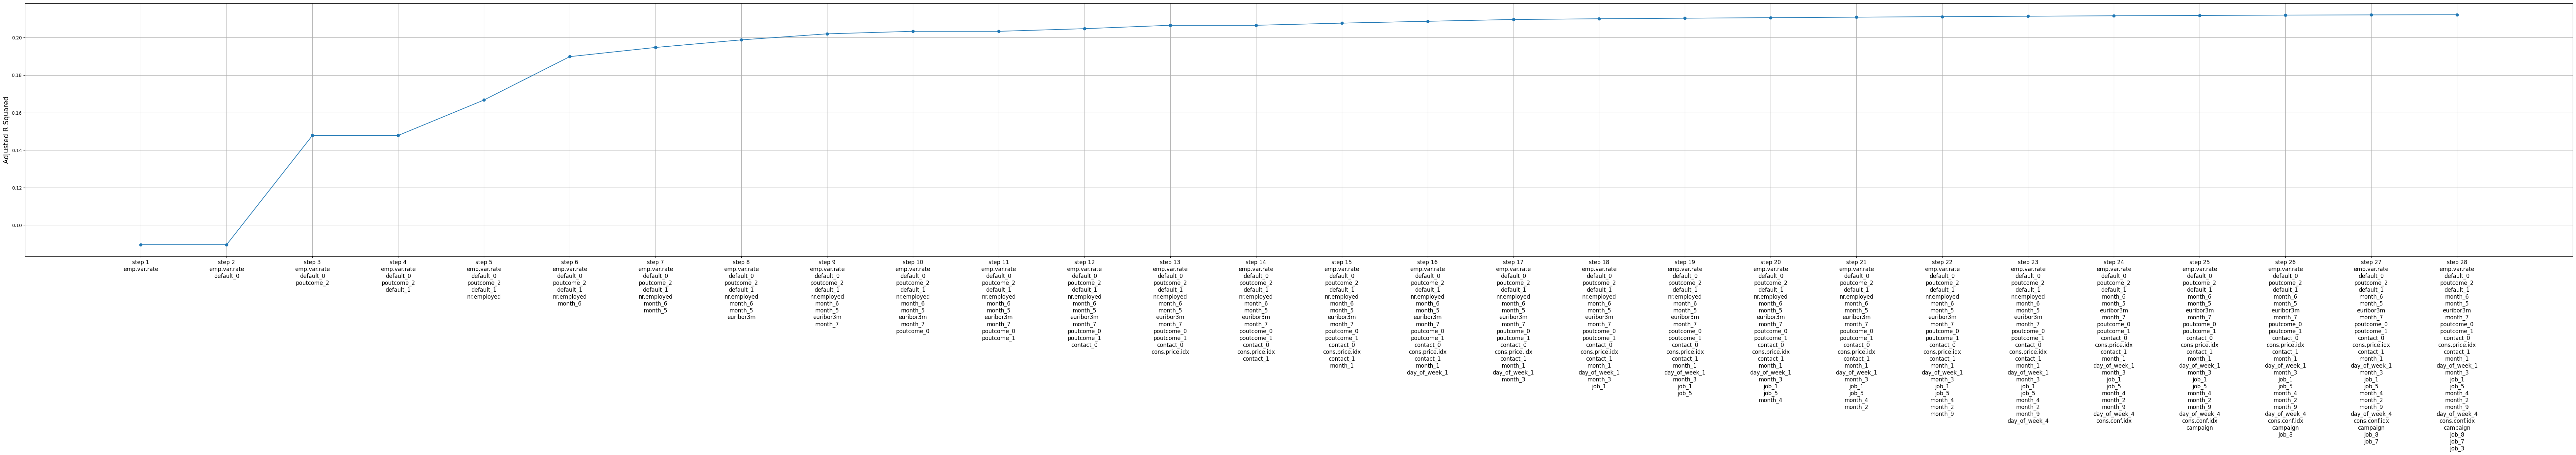

['emp.var.rate', 'default_0', 'poutcome_2', 'default_1', 'month_6', 'month_5', 'euribor3m', 'month_7', 'poutcome_0', 'poutcome_1', 'contact_0', 'cons.price.idx', 'contact_1', 'month_1', 'day_of_week_1', 'month_3', 'job_1', 'job_5', 'month_4', 'month_2', 'month_9', 'day_of_week_4', 'cons.conf.idx', 'campaign', 'job_8', 'job_7', 'job_3']


In [ ]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):

    y = y_train

    selected_variables = []
    sl_enter = 0.05 # standard p-value to enter the selected_variables
    sl_remove = 0.05 # standard p -value to remove from selected_variables

    sv_per_step = [] # selected variables for each step
    adjusted_r_squared = [] # adjusted R-squared for each step's model
    steps = []
    step = 0

    while len(variables) > 0: # repeat until there is no left feature anymore
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) # initialize Series of p-value of each feature

        # calculate p-values of feature in remainder
        for col in remainder:
            X = X_train[selected_variables+[col]]
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]

        min_pval = pval.min()

        # if p-value is lower than sl_enter, include that feature in selected_variables
        if min_pval < sl_enter:
            selected_variables.append(pval.idxmin())

            # examine whether there is a feature which has higher p-value than sl_remove
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: # remove a feature which has high p-value
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

selected_features = stepwise_feature_selection(X_train, y_train)
print(selected_features)

In [ ]:
print(selected_features)

['emp.var.rate', 'default_0', 'poutcome_2', 'default_1', 'month_6', 'month_5', 'euribor3m', 'month_7', 'poutcome_0', 'poutcome_1', 'contact_0', 'cons.price.idx', 'contact_1', 'month_1', 'day_of_week_1', 'month_3', 'job_1', 'job_5', 'month_4', 'month_2', 'month_9', 'day_of_week_4', 'cons.conf.idx', 'campaign', 'job_8', 'job_7', 'job_3']


In [ ]:
X_train = X_train[selected_features]
X_train

,emp.var.rate,default_0,poutcome_2,default_1,month_6,month_5,euribor3m,month_7,poutcome_0,poutcome_1,...,job_5,month_4,month_2,month_9,day_of_week_4,cons.conf.idx,campaign,job_8,job_7,job_3
4990,-1.883129,0.000091,-0.033475,-0.000091,-0.334628,0.986525,-2.062516,-0.098209,-0.102367,0.135842,...,0.957815,-0.129226,-0.004401,-0.013687,-0.197238,-9.468841,-1.56783,-0.021153,-0.096722,-0.026646
2979,-0.183129,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,0.453484,0.901791,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-1.468841,0.43217,-0.021153,-0.096722,-0.026646
30558,-0.183129,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,0.568484,0.901791,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-1.468841,0.43217,-0.021153,-0.096722,-0.026646
24249,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.338484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-2.168841,-1.56783,-0.021153,-0.096722,-0.026646
27929,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.343484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,4.431159,-1.56783,-0.021153,-0.096722,0.973354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.336484,-0.098209,-0.102367,0.135842,...,-0.042185,0.870774,-0.004401,-0.013687,-0.197238,-1.268841,-1.56783,-0.021153,-0.096722,-0.026646
3157,-1.883129,0.000091,-0.033475,-0.000091,0.665372,-0.013475,-2.378516,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-5.668841,-0.56783,-0.021153,-0.096722,-0.026646
28406,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.336484,-0.098209,-0.102367,0.135842,...,-0.042185,0.870774,-0.004401,-0.013687,-0.197238,-1.268841,3.43217,-0.021153,-0.096722,-0.026646
22377,-1.883129,0.000091,-0.033475,-0.000091,0.665372,-0.013475,-2.378516,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-5.668841,-1.56783,-0.021153,-0.096722,-0.026646


In [ ]:
X_test = X_test[selected_features]
X_test

,emp.var.rate,default_0,poutcome_2,default_1,month_6,month_5,euribor3m,month_7,poutcome_0,poutcome_1,...,job_5,month_4,month_2,month_9,day_of_week_4,cons.conf.idx,campaign,job_8,job_7,job_3
11815,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.345484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,4.431159,2.43217,-0.021153,-0.096722,-0.026646
29058,-1.883129,0.000091,-0.033475,-0.000091,-0.334628,0.986525,-1.811516,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-9.468841,0.43217,-0.021153,-0.096722,-0.026646
27393,-1.883129,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,-2.217516,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-6.568841,-0.56783,-0.021153,-0.096722,-0.026646
24754,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.340484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,0.802762,-2.168841,0.43217,-0.021153,-0.096722,-0.026646
1237,-0.183129,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,0.568484,0.901791,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,-1.468841,-1.56783,-0.021153,-0.096722,-0.026646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,1.016871,0.000091,-0.033475,-0.000091,0.665372,-0.013475,1.235484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,0.802762,4.131159,-0.56783,-0.021153,-0.096722,-0.026646
15372,1.016871,0.000091,-0.033475,-0.000091,0.665372,-0.013475,1.232484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,4.131159,-1.56783,-0.021153,-0.096722,-0.026646
31678,1.316871,0.000091,-0.033475,-0.000091,-0.334628,-0.013475,1.336484,-0.098209,-0.102367,0.135842,...,-0.042185,0.870774,-0.004401,-0.013687,-0.197238,-1.268841,-1.56783,-0.021153,-0.096722,-0.026646
18289,1.016871,0.000091,-0.033475,-0.000091,0.665372,-0.013475,1.233484,-0.098209,-0.102367,0.135842,...,-0.042185,-0.129226,-0.004401,-0.013687,-0.197238,4.131159,-1.56783,-0.021153,-0.096722,-0.026646


# Model

In [ ]:
! pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

## First Approach: Resampling

In [ ]:
def train (learning_rate,max_depth):

  # initialize number of models,
  # list for saving models and predictions,
  # and dataframe for saving P(y=1)

  n= 5
  GB_models=[]
  prob=pd.DataFrame()
  y_pred=[]

  # train model with resampled data
  for i in range(n):
    X_resampled,y_resampled=SMOTE(random_state=i).fit_resample(X_train,y_train) # resample
    model=GradientBoostingClassifier(random_state=i,learning_rate=learning_rate,max_depth=int(max_depth),n_estimators=100,n_iter_no_change=10)
    model.fit(X_resampled,y_resampled)
    GB_models.append(model) # save models in GB_models list

  # return P(y=1), predicted by models in GB_models list
  for trained_model in GB_models:
    y_prob=trained_model.predict_proba(X_test)[:,1]
    prob[f'{trained_model}']=y_prob

  tot_prob=prob.mean(axis=1) # caculate the avg of P(y=1) of all models in GB_models list

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(tot_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[3,25]
           }
optimizer = BayesianOptimization(
    f=train,
    pbounds=pbounds,
    random_state=1,
)

In [ ]:
optimizer.maximize(
    init_points=7,
    n_iter=10
)

|   iter    |  target   | learni... | max_depth |
-------------------------------------------------
| 1         | 0.0       | 0.04176   | 18.85     |
| 2         | 0.4734    | 0.0001114 | 9.651     |
| 3         | 0.4876    | 0.01476   | 5.031     |
| 4         | 0.4793    | 0.01871   | 10.6      |
| 5         | 0.4418    | 0.03974   | 14.85     |
| 6         | 0.4092    | 0.04198   | 18.07     |
| 7         | 0.3786    | 0.02052   | 22.32     |
| 8         | 0.4821    | 0.008715  | 5.033     |
| 9         | 0.4893    | 0.1       | 4.725     |
| 10        | 0.4469    | 0.03793   | 14.86     |
| 11        | 0.0       | 0.009466  | 15.02     |
| 12        | 0.4883    | 0.05449   | 4.878     |
| 13        | 0.4817    | 0.09483   | 5.132     |
| 14        | 0.4867    | 0.004243  | 4.62      |
| 15        | 0.4871    | 0.09091   | 4.505     |
| 16        | 0.4095    | 0.05536   | 18.45     |
| 17        | 0.4624    | 0.01493   | 11.95     |


## Second Approach: Assign Weights

In [ ]:
from lightgbm import LGBMClassifier

def train (learning_rate,max_depth,num_leaves,n_estimators,reg_alpha,reg_lambda):

  # list for saving models and predictions,
  # and dataframe for saving P(y=1)
  y_pred=[]
  LGBM_models=[]
  prob=pd.DataFrame()


  # train model with parameter 'is_unbalance=True'
  model=LGBMClassifier(learning_rate=learning_rate,
                        max_depth=int(max_depth),is_unbalance=True,verbose=-1,
                       num_leaves=int(num_leaves),n_estimators=int(n_estimators),
                       reg_alpha=reg_alpha,reg_lambda=reg_lambda)

  model.fit(X_train,y_train)
  LGBM_models.append(model) #save models in LGBM_models list


  # return P(y=1), predicted by models in LGBM_models list
  for trained_model in LGBM_models:
    y_prob=trained_model.predict_proba(X_test)[:,1]
    prob[f'{trained_model}']=y_prob

  tot_prob=prob.mean(axis=1)  # caculate the avg of P(y=1) of all models in LGBM_models list

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(tot_prob > threshold, 1, 0)


  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1,y_pred,threshold

def train_wrapper(**kwargs):
    f1, _, _ = train(**kwargs)
    return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[10,200],
           'n_estimators':[10,300],
           'num_leaves':[10,100],
           'reg_alpha':[0.0,0.1],
           'reg_lambda':[0,0.1]
           }

optimizer = BayesianOptimization(
    f=train_wrapper,
    pbounds=pbounds,
    random_state=1
)

In [ ]:
optimizer.maximize(
    init_points=30,
    n_iter=100
)

In [ ]:
# threshold
train(learning_rate=0.1,max_depth=135.4,num_leaves=10.0,n_estimators=223.0,reg_alpha=0.0,reg_lambda=0.1)[2]

0.676837486266164

## feature importance

In [ ]:
model_lgbm=LGBMClassifier(learning_rate=0.1,
                      max_depth=int(135.4),is_unbalance=True,verbose=-1,
                      num_leaves=int(10.0),n_estimators=int(223.0),
                      reg_alpha=0.0,reg_lambda=0.1)

model_lgbm.fit(X_train, y_train)

importances = model_lgbm.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by = 'importance', ascending = False)

feature_importance_df

,feature,importance
15,euribor3m,623
21,campaign,407
7,cons.conf.idx,142
13,cons.price.idx,93
10,contact_0,93
18,job_1,90
8,day_of_week_1,75
5,poutcome_0,61
19,day_of_week_4,58
25,job_7,54


## correct predicted data

In [ ]:
y_pred=pd.Series(train(learning_rate=0.1,max_depth=135.4,num_leaves=10.0,n_estimators=223.0,reg_alpha=0.0,reg_lambda=0.1)[1])
y_pred.index = y_test.index

y_pred

11815    0
29058    1
27393    0
24754    0
1237     0
        ..
7867     0
15372    0
31678    0
18289    0
3859     0
Length: 6590, dtype: int64

In [ ]:
y_test

In [ ]:
correct_indices = (y_test == y_pred)

X_correct = X_test[correct_indices]
y_correct_actual = y_test[correct_indices]
y_correct_pred = y_pred[correct_indices]

correct_df = pd.DataFrame(X_correct, columns = X_test.columns)
correct_df['Actual'] = y_correct_actual
correct_df['Predicted'] = y_correct_pred

correct_df

In [ ]:
# select numeric features only

correct_numeric = correct_df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'Actual', 'Predicted']]

In [ ]:
# extract data of 'Actual' == 1 from correct_numeric
# to identify the numercial feature's distribution of clients who subscribed
correct_numeric[correct_numeric['Actual'] == 1].hist()

plt.suptitle('after_model_actual_1')
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

# Test Dataset

## Data Exploration

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8238 non-null   int64  
 1   age             8238 non-null   int64  
 2   job             8238 non-null   object 
 3   marital         8238 non-null   object 
 4   education       8238 non-null   object 
 5   default         8238 non-null   object 
 6   housing         8238 non-null   object 
 7   loan            8238 non-null   object 
 8   contact         8238 non-null   object 
 9   month           8238 non-null   object 
 10  day_of_week     8238 non-null   object 
 11  campaign        8238 non-null   int64  
 12  pdays           8238 non-null   int64  
 13  previous        8238 non-null   int64  
 14  poutcome        8238 non-null   object 
 15  emp.var.rate    8238 non-null   float64
 16  cons.price.idx  8238 non-null   float64
 17  cons.conf.idx   8238 non-null   f

In [ ]:
duplicate_count = test[test.duplicated()]
print(duplicate_count)

Empty DataFrame
Columns: [id, age, job, marital, education, default, housing, loan, contact, month, day_of_week, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


In [ ]:
test_id=test['id']

## Data drop

In [ ]:
test = test.drop(columns = 'id')
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,unknown,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,30,services,married,high.school,no,yes,no,telephone,nov,thu,7,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
8234,47,admin.,married,high.school,no,yes,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8235,37,entrepreneur,married,basic.9y,no,no,no,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
8236,47,services,married,high.school,unknown,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0


## Explore outlier & Remove outlier

In [ ]:
test_fixed = test.replace('unknown', np.nan, inplace = False)
test = test_fixed
print(test.isnull().sum())

age                  0
job                 73
marital             18
education          343
default           1744
housing            191
loan               191
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


### Explore outlier with boxplot

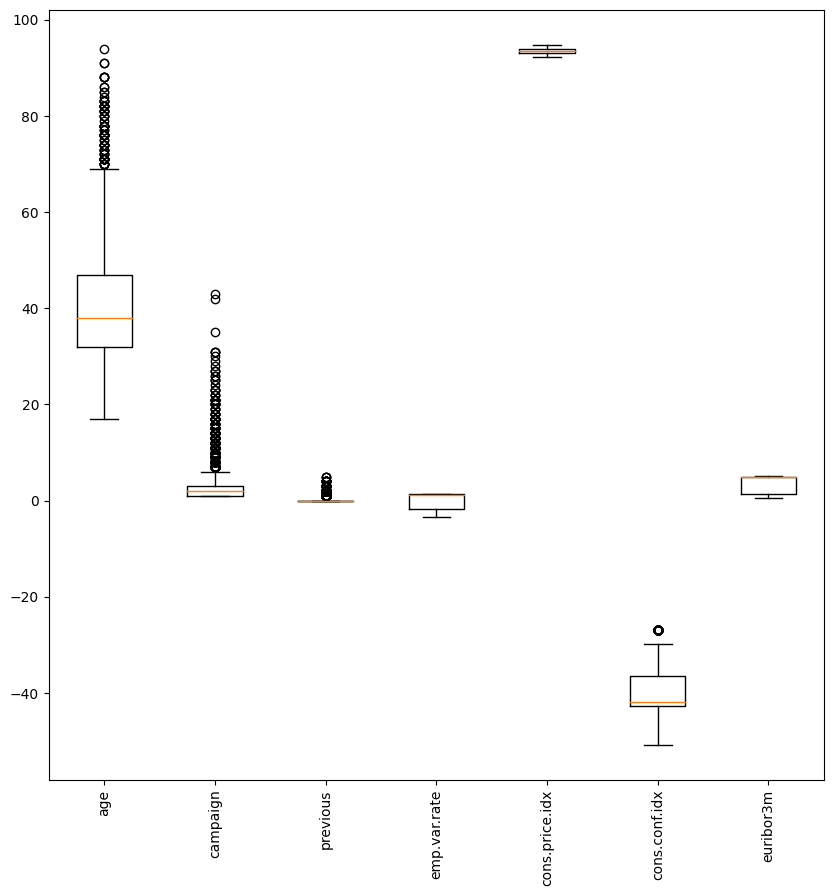

In [ ]:
plt.figure(figsize = (10, 10))
plt.boxplot([test['age'], test['campaign'], test['previous'], test['emp.var.rate'], test['cons.price.idx'], test['cons.conf.idx'], test['euribor3m']])
plt.xticks(ticks = range(1, 8), labels = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], rotation = 90)
plt.show()

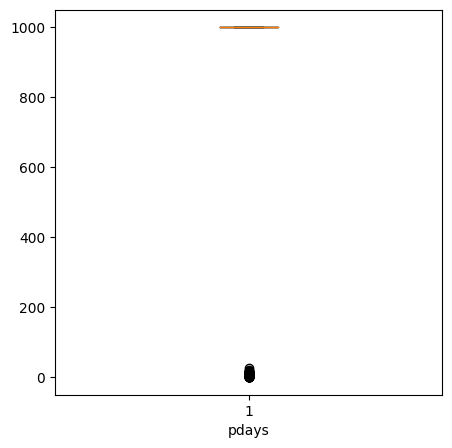

In [ ]:
plt.figure(figsize = (5, 5))
plt.boxplot(test['pdays'])
plt.xlabel("pdays")
plt.show()

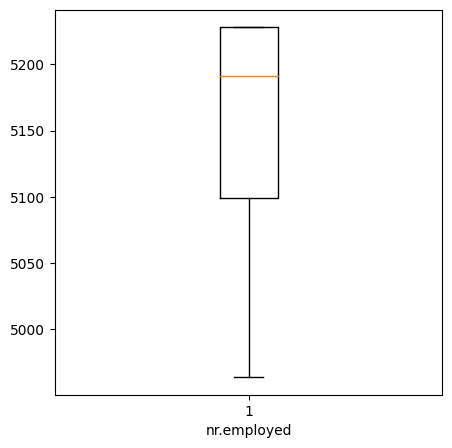

In [ ]:
plt.figure(figsize = (5, 5))
plt.boxplot(test['nr.employed'])
plt.xlabel("nr.employed")
plt.show()

### Remove outlier

In [ ]:
def remove_outliers_box(data, columns):

    data_df = data.copy()

    for col in columns:

        Q1 = data_df[col].quantile(0.25)
        Q3 = data_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        max_value = data_df.loc[(data_df[col] >= lower_bound) & (data_df[col] <= upper_bound), col].max()
        data_df.loc[(data_df[col] <= lower_bound) | (data_df[col] >= upper_bound), col] = max_value

    return data_df

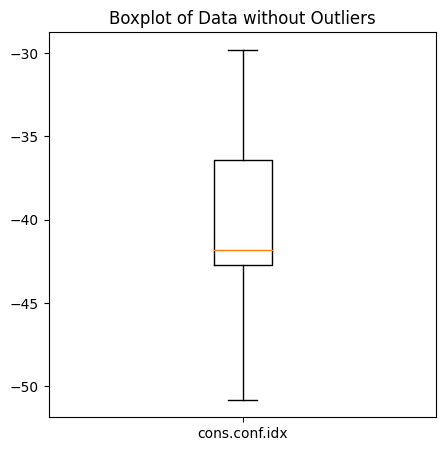

In [ ]:
cleaned_data = remove_outliers_box(test, ['cons.conf.idx'])

plt.figure(figsize=(5, 5))
plt.boxplot([cleaned_data['cons.conf.idx'].values])
plt.xticks(ticks=range(1, 2), labels=['cons.conf.idx'])
plt.title('Boxplot of Data without Outliers')
plt.show()

In [ ]:
test = cleaned_data
test['age'] = test['age'].astype(int)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,30,services,married,high.school,no,yes,no,telephone,nov,thu,7,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
8234,47,admin.,married,high.school,no,yes,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8235,37,entrepreneur,married,basic.9y,no,no,no,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
8236,47,services,married,high.school,NaN,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0


##Fill NaN

### Fill NaN proportionally

In [ ]:
job_total = pd.DataFrame(test['job'].value_counts())

job_dict = {job: 0 for job in test['job'].unique() if job != 'nan'}

for job in test['job'].unique():
  test_ = test[test['job'] == job]
  job_dict[job] = len(test_) / len(test['job'].values)

job_dict = {k: f"{v:.2f}" for k, v in job_dict.items()}
print(job_dict)

{'admin.': '0.25', 'entrepreneur': '0.03', 'unemployed': '0.02', 'services': '0.10', 'blue-collar': '0.22', 'housemaid': '0.02', 'self-employed': '0.03', 'retired': '0.04', 'technician': '0.17', 'management': '0.07', 'student': '0.02', nan: '0.00'}


In [ ]:
job_null = test['job'].isnull().sum()

job_count = {job: 0 for job in test['job'].unique()}

for key in job_dict.keys():
  job_count[key] = job_null * float(job_dict[key])

job_count = {k: f"{v:.2f}" for k, v in job_count.items()}
print(job_count)

{'admin.': '18.25', 'entrepreneur': '2.19', 'unemployed': '1.46', 'services': '7.30', 'blue-collar': '16.06', 'housemaid': '1.46', 'self-employed': '2.19', 'retired': '2.92', 'technician': '12.41', 'management': '5.11', 'student': '1.46', nan: '0.00'}


In [ ]:
test_job_null = test[test['job'].isna()]

test_job_null.iloc[0:19, 1] = 'admin.'
test_job_null.iloc[19:32, 1] = 'technician'
test_job_null.iloc[32:40, 1] = 'services'
test_job_null.iloc[40:43, 1] = 'retired'
test_job_null.iloc[43:45, 1] = 'entrepreneur'
test_job_null.iloc[45:62, 1] = 'blue-collar'
test_job_null.iloc[62:63, 1] = 'unemployed'
test_job_null.iloc[63:64, 1] = 'student'
test_job_null.iloc[64:66, 1] = 'self-employed'
test_job_null.iloc[66:71, 1] = 'management'
test_job_null.iloc[71:73, 1] = 'housemaid'

test_job_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
183,26,admin.,single,basic.9y,no,no,no,cellular,mar,tue,1,999,0,nonexistent,-1.8,92.843,-50.0,1.799,5099.1
281,34,admin.,married,basic.4y,NaN,yes,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
492,64,admin.,married,NaN,no,no,no,cellular,nov,mon,1,3,3,success,-1.1,94.767,-50.8,1.048,4963.6
631,53,admin.,single,NaN,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
690,61,admin.,single,basic.4y,no,yes,no,cellular,may,tue,1,3,1,success,-1.8,92.893,-46.2,1.266,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,55,management,married,basic.4y,NaN,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7975,48,management,married,basic.6y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
8000,34,management,married,basic.4y,no,yes,no,cellular,apr,thu,1,999,0,nonexistent,-1.8,93.075,-47.1,1.406,5099.1
8135,44,housemaid,divorced,NaN,no,no,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1


In [ ]:
test = test.dropna(subset = ['job'])
test = pd.concat([test, test_job_null], axis = 0, ignore_index = True)

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,55,management,married,basic.4y,NaN,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8234,48,management,married,basic.6y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
8235,34,management,married,basic.4y,no,yes,no,cellular,apr,thu,1,999,0,nonexistent,-1.8,93.075,-47.1,1.406,5099.1
8236,44,housemaid,divorced,NaN,no,no,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1


In [ ]:
marital_total=pd.DataFrame(test['marital'].value_counts())

marital_dict = {i: 0 for i in test['marital'].unique()}

for i in test['marital'].unique():
  test_ = test[test['marital'] == i]
  marital_dict[i] = len(test_) / len(test['marital'].values)

marital_dict = {k: f"{v:.2f}" for k, v in marital_dict.items()}
print(marital_dict)

{'married': '0.60', 'divorced': '0.11', 'single': '0.29', nan: '0.00'}


In [ ]:
marital_null = test['marital'].isnull().sum()

marital_count = {i: 0 for i in test['marital'].unique()}

for key in marital_dict.keys():
  marital_count[key] = marital_null * float(marital_dict[key])

marital_count = {k: f"{v:.2f}" for k, v in marital_count.items()}
print(marital_count)

{'married': '10.80', 'divorced': '1.98', 'single': '5.22', nan: '0.00'}


In [ ]:
test_marital_null = test[test['marital'].isna()]

test_marital_null.iloc[0:11, 2] = 'married'
test_marital_null.iloc[11:16, 2] = 'single'
test_marital_null.iloc[16:18, 2] = 'divorced'

test_marital_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
243,29,technician,married,high.school,no,yes,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
406,35,services,married,high.school,no,no,no,cellular,may,tue,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1
1545,31,self-employed,married,professional.course,no,no,yes,cellular,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
1576,49,admin.,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2087,34,admin.,married,university.degree,no,no,no,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1
2699,31,self-employed,married,professional.course,no,no,no,cellular,jul,thu,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
3456,29,admin.,married,professional.course,no,yes,no,cellular,nov,thu,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8
3477,55,technician,married,NaN,NaN,no,no,telephone,jun,thu,3,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1
4042,49,admin.,married,university.degree,no,no,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
4182,30,technician,married,university.degree,no,no,no,cellular,mar,mon,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7


In [ ]:
test = test.dropna(subset = ['marital'])
test = pd.concat([test, test_marital_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,NaN,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
8234,37,blue-collar,single,basic.6y,NaN,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2


In [ ]:
test['default'] = test['default'].fillna('no')
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,54,housemaid,single,basic.4y,no,yes,no,cellular,jul,wed,13,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
8234,37,blue-collar,single,basic.6y,no,no,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
8235,31,entrepreneur,single,university.degree,no,no,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-29.8,0.722,5017.5
8236,66,retired,divorced,basic.9y,no,yes,no,cellular,aug,wed,3,999,2,failure,-2.9,92.201,-31.4,0.879,5076.2


In [ ]:
test['default'].value_counts()

default
no    8238
Name: count, dtype: int64

In [ ]:
import random

idx = len(test)
num = random.randint(1, idx)

test['default'][num] = "yes"

test['default'].value_counts()

default
no     8237
yes       1
Name: count, dtype: int64

In [ ]:
loan_total=pd.DataFrame(test['loan'].value_counts())

loan_dict = {i: 0 for i in test['loan'].unique()}

for i in test['loan'].unique():
  test_ = test[test['loan'] == i]
  loan_dict[i] = len(test_) / len(test['loan'].values)

loan_dict = {k: f"{v:.2f}" for k, v in loan_dict.items()}
print(loan_dict)

{'no': '0.83', 'yes': '0.15', nan: '0.00'}


In [ ]:
loan_null = test['loan'].isnull().sum()

loan_count = {i: 0 for i in test['loan'].unique()}

for key in loan_dict.keys():
  loan_count[key] = loan_null * float(loan_dict[key])

loan_count = {k: f"{v:.2f}" for k, v in loan_count.items()}
print(loan_count)

{'no': '158.53', 'yes': '28.65', nan: '0.00'}


In [ ]:
test_loan_null = test[test['loan'].isna()]

test_loan_null.iloc[0:160, 6] = 'no'
test_loan_null.iloc[160:191, 6] = 'yes'

test_loan_null

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
57,55,blue-collar,married,basic.4y,no,NaN,no,telephone,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1
71,52,services,married,high.school,no,NaN,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0
107,34,technician,married,professional.course,no,NaN,no,cellular,sep,fri,1,6,4,success,-1.1,94.199,-37.5,0.883,4963.6
131,42,blue-collar,married,basic.4y,no,NaN,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
146,39,blue-collar,married,basic.9y,no,NaN,no,telephone,jun,wed,4,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,40,admin.,single,high.school,no,NaN,yes,cellular,nov,mon,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
8091,51,admin.,divorced,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8104,48,blue-collar,married,basic.6y,no,NaN,yes,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
8131,39,admin.,married,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
test = test.dropna(subset = ['loan'])
test = pd.concat([test, test_loan_null], axis = 0, ignore_index = True)
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,admin.,married,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,36,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2,27,unemployed,married,high.school,no,yes,no,cellular,may,mon,4,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1
3,39,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
4,43,services,married,high.school,no,yes,no,telephone,jun,fri,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,admin.,single,high.school,no,NaN,yes,cellular,nov,mon,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
8234,51,admin.,divorced,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8235,48,blue-collar,married,basic.6y,no,NaN,yes,telephone,jun,fri,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
8236,39,admin.,married,university.degree,no,NaN,yes,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
test.isnull().sum()

age                 0
job                 0
marital             0
education         343
default             0
housing           191
loan                0
contact             0
month               0
day_of_week         0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
dtype: int64

### Fill NaN with KNN

### Label Encoding

In [ ]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

label_encoders = {}

for col in columns:
    le = LabelEncoder()
    train_copy[col] = le.fit_transform(train_copy[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

# print labels and their corresponding encoding values
for col, le in label_encoders.items():
    print(col + ":", le.classes_)

job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
marital: ['divorced' 'married' 'single']
education: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' nan]
default: ['no' 'yes']
housing: ['no' 'yes' nan]
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week: ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome: ['failure' 'nonexistent' 'success']


In [ ]:
test['education'] = test['education'].replace(7, np.nan)
test['housing'] = test['housing'].replace(2, np.nan)

### KNN

In [ ]:
# declare imputer
imputer = KNNImputer(n_neighbors = 5)

filled_train = imputer.fit_transform(train_copy)

filled_test = imputer.transform(test)
filled_test = pd.DataFrame(filled_test, columns = test.columns)

In [ ]:
test = filled_test
test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,999.0,0.0,1.0,-0.1,93.200,-42.0,4.191,5195.8
1,36.0,2.0,1.0,6.0,0.0,1.0,1.0,1.0,4.0,4.0,1.0,999.0,0.0,1.0,1.4,94.465,-41.8,4.864,5228.1
2,27.0,10.0,1.0,3.0,0.0,1.0,0.0,0.0,6.0,1.0,4.0,999.0,0.0,1.0,-1.8,92.893,-46.2,1.244,5099.1
3,39.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,999.0,0.0,1.0,1.4,93.444,-36.1,4.965,5228.1
4,43.0,7.0,1.0,3.0,0.0,1.0,0.0,1.0,4.0,0.0,2.0,999.0,0.0,1.0,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40.0,0.0,2.0,3.0,0.0,0.6,1.0,0.0,7.0,1.0,2.0,999.0,0.0,1.0,-0.1,93.200,-42.0,4.191,5195.8
8234,51.0,0.0,0.0,6.0,0.0,0.2,1.0,1.0,6.0,4.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0
8235,48.0,1.0,1.0,1.0,0.0,0.6,1.0,1.0,4.0,0.0,1.0,999.0,0.0,1.0,1.4,94.465,-41.8,4.967,5228.1
8236,39.0,0.0,1.0,6.0,0.0,0.8,1.0,1.0,6.0,4.0,2.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
test['education'].value_counts()

education
6.0    2457
3.0    1878
2.0    1220
5.0    1105
0.0     824
1.0     474
4.0      22
4.8      22
4.2      21
3.4      17
3.8      15
2.2      15
2.4      14
5.2      13
2.8      12
3.2      12
1.4      12
5.4      12
3.6      12
1.8      11
4.4      10
4.6       9
5.6       9
6.2       8
2.6       7
1.6       7
1.2       5
5.8       4
0.8       3
6.6       3
0.4       2
7.0       1
0.6       1
0.2       1
Name: count, dtype: int64

In [ ]:
test['age'] = test['age'].astype(int)
test['job'] = test['job'].astype(int)
test['marital'] = test['marital'].astype(int)
test['education'] = round(test['education']).astype(int)
test['default'] = test['default'].astype(int)
test['housing'] = round(test['housing']).astype(int)
test['loan'] = test['loan'].astype(int)
test['contact'] = test['contact'].astype(int)
test['month'] = test['month'].astype(int)
test['day_of_week'] = test['day_of_week'].astype(int)
test['campaign'] = test['campaign'].astype(int)
test['pdays'] = test['pdays'].astype(int)
test['previous'] = test['previous'].astype(int)
test['poutcome'] = test['poutcome'].astype(int)

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,0,1,6,0,0,0,0,7,1,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
1,36,2,1,6,0,1,1,1,4,4,1,999,0,1,1.4,94.465,-41.8,4.864,5228.1
2,27,10,1,3,0,1,0,0,6,1,4,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
3,39,0,1,6,0,1,0,0,1,1,4,999,0,1,1.4,93.444,-36.1,4.965,5228.1
4,43,7,1,3,0,1,0,1,4,0,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,0,2,3,0,1,1,0,7,1,2,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
8234,51,0,0,6,0,0,1,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
8235,48,1,1,1,0,1,1,1,4,0,1,999,0,1,1.4,94.465,-41.8,4.967,5228.1
8236,39,0,1,6,0,1,1,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
test['education'] = test['education'].replace(7, 6)
test['education'].value_counts()

education
6    2482
3    1926
2    1267
5    1161
0     827
1     495
4      80
Name: count, dtype: int64

In [ ]:
columns_to_string = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'poutcome']
test[columns_to_string] = test[columns_to_string].astype(str)

##Feature Selection

In [ ]:
data = test.drop(columns = ['pdays'], axis = 1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,54,0,1,6,0,0,0,0,7,1,1,0,1,-0.1,93.200,-42.0,4.191,5195.8
1,36,2,1,6,0,1,1,1,4,4,1,0,1,1.4,94.465,-41.8,4.864,5228.1
2,27,10,1,3,0,1,0,0,6,1,4,0,1,-1.8,92.893,-46.2,1.244,5099.1
3,39,0,1,6,0,1,0,0,1,1,4,0,1,1.4,93.444,-36.1,4.965,5228.1
4,43,7,1,3,0,1,0,1,4,0,2,0,1,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,0,2,3,0,1,1,0,7,1,2,0,1,-0.1,93.200,-42.0,4.191,5195.8
8234,51,0,0,6,0,0,1,1,6,4,2,0,1,1.1,93.994,-36.4,4.857,5191.0
8235,48,1,1,1,0,1,1,1,4,0,1,0,1,1.4,94.465,-41.8,4.967,5228.1
8236,39,0,1,6,0,1,1,1,6,4,2,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
data=pd.get_dummies(data)
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,54,1,0,-0.1,93.200,-42.0,4.191,5195.8,True,False,...,False,False,False,True,False,False,False,False,True,False
1,36,1,0,1.4,94.465,-41.8,4.864,5228.1,False,False,...,False,False,False,False,False,False,True,False,True,False
2,27,4,0,-1.8,92.893,-46.2,1.244,5099.1,False,False,...,False,False,False,True,False,False,False,False,True,False
3,39,4,0,1.4,93.444,-36.1,4.965,5228.1,True,False,...,False,False,False,True,False,False,False,False,True,False
4,43,2,0,1.4,94.465,-41.8,4.959,5228.1,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,2,0,-0.1,93.200,-42.0,4.191,5195.8,True,False,...,False,False,False,True,False,False,False,False,True,False
8234,51,2,0,1.1,93.994,-36.4,4.857,5191.0,True,False,...,False,False,False,False,False,False,True,False,True,False
8235,48,1,0,1.4,94.465,-41.8,4.967,5228.1,False,True,...,False,False,True,False,False,False,False,False,True,False
8236,39,2,0,1.1,93.994,-36.4,4.857,5191.0,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
data.replace({False: 0, True: 1}, inplace = True)
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,54,1,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,...,0,0,0,1,0,0,0,0,1,0
1,36,1,0,1.4,94.465,-41.8,4.864,5228.1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,27,4,0,-1.8,92.893,-46.2,1.244,5099.1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,39,4,0,1.4,93.444,-36.1,4.965,5228.1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,43,2,0,1.4,94.465,-41.8,4.959,5228.1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,40,2,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,...,0,0,0,1,0,0,0,0,1,0
8234,51,2,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,1,0
8235,48,1,0,1.4,94.465,-41.8,4.967,5228.1,0,1,...,0,0,1,0,0,0,0,0,1,0
8236,39,2,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
data -= data.mean(axis = 0)
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,13.974508,-1.566642,-0.173464,-0.176912,-0.371882,-1.454273,0.57461,28.766424,0.744234,-0.226026,...,-0.01663,-0.014445,-0.185967,0.792668,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
1,-4.025492,-1.566642,-0.173464,1.323088,0.893118,-1.254273,1.24761,61.066424,-0.255766,-0.226026,...,-0.01663,-0.014445,-0.185967,-0.207332,-0.218742,-0.189488,0.801529,-0.106701,0.139476,-0.032775
2,-13.025492,1.433358,-0.173464,-1.876912,-0.678882,-5.654273,-2.37239,-67.933576,-0.255766,-0.226026,...,-0.01663,-0.014445,-0.185967,0.792668,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
3,-1.025492,1.433358,-0.173464,1.323088,-0.127882,4.445727,1.34861,61.066424,0.744234,-0.226026,...,-0.01663,-0.014445,-0.185967,0.792668,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
4,2.974508,-0.566642,-0.173464,1.323088,0.893118,-1.254273,1.34261,61.066424,-0.255766,-0.226026,...,-0.01663,-0.014445,0.814033,-0.207332,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,-0.025492,-0.566642,-0.173464,-0.176912,-0.371882,-1.454273,0.57461,28.766424,0.744234,-0.226026,...,-0.01663,-0.014445,-0.185967,0.792668,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
8234,10.974508,-0.566642,-0.173464,1.023088,0.422118,4.145727,1.24061,23.966424,0.744234,-0.226026,...,-0.01663,-0.014445,-0.185967,-0.207332,-0.218742,-0.189488,0.801529,-0.106701,0.139476,-0.032775
8235,7.974508,-1.566642,-0.173464,1.323088,0.893118,-1.254273,1.35061,61.066424,-0.255766,0.773974,...,-0.01663,-0.014445,0.814033,-0.207332,-0.218742,-0.189488,-0.198471,-0.106701,0.139476,-0.032775
8236,-1.025492,-0.566642,-0.173464,1.023088,0.422118,4.145727,1.24061,23.966424,0.744234,-0.226026,...,-0.01663,-0.014445,-0.185967,-0.207332,-0.218742,-0.189488,0.801529,-0.106701,0.139476,-0.032775


In [ ]:
data.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_0', 'job_1', 'job_10',
       'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9',
       'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'education_5',
       'education_6', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_0', 'contact_1', 'month_0', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'poutcome_0', 'poutcome_1',
       'poutcome_2'],
      dtype='object')

In [ ]:
columns_to_drop = ['age', 'previous', 'nr.employed', 'job_0', 'job_10', 'job_2', 'job_4', 'job_6', 'job_9',
           'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3',
           'education_4', 'education_5', 'education_6','housing_0', 'housing_1', 'loan_0', 'loan_1',
           'day_of_week_0', 'day_of_week_2', 'day_of_week_3', 'month_3', 'month_8']

test = data.drop(columns=columns_to_drop)

test

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_1,job_3,job_5,job_7,job_8,...,month_4,month_5,month_6,month_7,month_9,day_of_week_1,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,-1.566642,-0.176912,-0.371882,-1.454273,0.57461,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,-0.332969,0.894999,-0.014445,0.792668,-0.198471,-0.106701,0.139476,-0.032775
1,-1.566642,1.323088,0.893118,-1.254273,1.24761,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,0.871328,-0.012382,-0.332969,-0.105001,-0.014445,-0.207332,0.801529,-0.106701,0.139476,-0.032775
2,1.433358,-1.876912,-0.678882,-5.654273,-2.37239,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,0.667031,-0.105001,-0.014445,0.792668,-0.198471,-0.106701,0.139476,-0.032775
3,1.433358,1.323088,-0.127882,4.445727,1.34861,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,-0.332969,-0.105001,-0.014445,0.792668,-0.198471,-0.106701,0.139476,-0.032775
4,-0.566642,1.323088,0.893118,-1.254273,1.34261,-0.226026,-0.023307,-0.041636,0.900825,-0.022336,...,0.871328,-0.012382,-0.332969,-0.105001,-0.014445,-0.207332,-0.198471,-0.106701,0.139476,-0.032775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,-0.566642,-0.176912,-0.371882,-1.454273,0.57461,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,-0.332969,0.894999,-0.014445,0.792668,-0.198471,-0.106701,0.139476,-0.032775
8234,-0.566642,1.023088,0.422118,4.145727,1.24061,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,0.667031,-0.105001,-0.014445,-0.207332,0.801529,-0.106701,0.139476,-0.032775
8235,-1.566642,1.323088,0.893118,-1.254273,1.35061,0.773974,-0.023307,-0.041636,-0.099175,-0.022336,...,0.871328,-0.012382,-0.332969,-0.105001,-0.014445,-0.207332,-0.198471,-0.106701,0.139476,-0.032775
8236,-0.566642,1.023088,0.422118,4.145727,1.24061,-0.226026,-0.023307,-0.041636,-0.099175,-0.022336,...,-0.128672,-0.012382,0.667031,-0.105001,-0.014445,-0.207332,0.801529,-0.106701,0.139476,-0.032775


In [ ]:
test.columns

Index(['campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'job_1', 'job_3', 'job_5', 'job_7', 'job_8', 'default_0',
       'default_1', 'contact_0', 'contact_1', 'month_0', 'month_1', 'month_2',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'day_of_week_1',
       'day_of_week_4', 'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

## Model

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
model_lgbm=LGBMClassifier(learning_rate=0.1,
                      max_depth=int(135.4),is_unbalance=True,verbose=-1,
                      num_leaves=int(10.0),n_estimators=int(223.0),
                      reg_alpha=0.0,reg_lambda=0.1)

model_lgbm.fit(X_train, y_train)

y_prob=model_lgbm.predict_proba(test)[:,1]
threshold=0.676837486266164
y_pred=np.where(y_prob > threshold, 1, 0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred= pd.DataFrame(y_pred, columns=['prediction'])
y_pred

,prediction
0,0
1,0
2,0
3,1
4,0
...,...
8233,0
8234,0
8235,0
8236,0


In [ ]:
test_id=pd.DataFrame(test_id)
test_id

,id
0,24188
1,8688
2,35789
3,20034
4,11392
...,...
8233,26975
8234,6863
8235,9449
8236,916


In [ ]:
output=pd.concat([test_id, y_pred], axis=1, ignore_index=False)
output

,id,prediction
0,24188,0
1,8688,0
2,35789,0
3,20034,1
4,11392,0
...,...,...
8233,26975,0
8234,6863,0
8235,9449,0
8236,916,0


In [ ]:
import os
directory = '/content/drive/MyDrive/grade_2/pattern_recognition/project/dataset'


if not os.path.exists(directory):
    os.makedirs(directory)

file_path = os.path.join(directory, 'output.csv')
output.to_csv(file_path, index=False)